<a href="https://colab.research.google.com/github/PravinMuraliDharan/Data_Science_Capstone_Project/blob/Child_Branch/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Premise

---

> <b>Capstone Project : Supervised Learning - Regression   
>  Rossmann Sales Prediction : Predicting sales of a major store chain Rossmann





# <b> Table of Content

---

*   **Problem Description**
*   **Dataset Description**
*   **Importing Necessary Libraries**
*   **Data Preparation**
*   **Exploratory Data Analysis**
*   **Preprocessing**
*   **Modelling - Machine Learning Approach**
*   **Results Comparison**
*   **Conclusion** 

# <b> Problem Description

---

> <b> Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

> <b> You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# <b> Dataset Description

---



> <b>Rossmann Stores Data.csv </b> - historical data including Sales
> <b>store.csv </b> - supplemental information about the stores


> <b><u>Data fields</u></b>
> Most of the fields are self-explanatory. The following are descriptions for those that aren't.
  * Id - an Id that represents a (Store, Date) duple within the test set
  * Store - a unique Id for each store
  * Sales - the turnover for any given day (this is what you are predicting)
  * Customers - the number of customers on a given day
  * Open - an indicator for whether the store was open: 0 = closed, 1 = open
  * StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
  * SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
  * StoreType - differentiates between 4 different store models: a, b, c, d
  * Assortment - describes an assortment level: a = basic, b = extra, c = extended
  * CompetitionDistance - distance in meters to the nearest competitor store
  * CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
  * Promo - indicates whether a store is running a promo on that day
  * Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
  * Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
  * PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# <b> Importing Necessary Libraries

---


In [1]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np

# Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Datetime library for date and time functions
from datetime import datetime as dt

# Libraries for Missing Values
import missingno as miss_val

# Libraries for Splitting the Dataset
from sklearn.model_selection import train_test_split

# Libraries for Standardizing the Dataset
from sklearn.preprocessing import StandardScaler

# Libraries for Machine Learing Algorithms
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for Cross Validation
from sklearn.model_selection import RandomizedSearchCV

# Libraries for Accessing the Algorithms
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

print('All libraries are imported Successfully :)')

All libraries are imported Successfully :)


# <b> Data Preparation

---



In [3]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> - Loading Datasets

In [4]:
# Load Dataset from Drive
dir = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/0.Capstone Project/2.SVML - Regression/Data and Resources/Rossmann Stores Data.csv'
sales_df = pd.read_csv(dir,parse_dates= ['Date'])

dir_1 = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/0.Capstone Project/2.SVML - Regression/Data and Resources/store.csv'
store_df = pd.read_csv(dir_1)

In [5]:
# Looking into shape of sales_df
print('Rossmann Stores Dataset Shape:' ,sales_df.shape)
sales_df.head()

Rossmann Stores Dataset Shape: (1017209, 9)


Store  DayOfWeek       Date  Sales  ...  Open  Promo  StateHoliday SchoolHoliday
0      1          5 2015-07-31   5263  ...     1      1             0             1
1      2          5 2015-07-31   6064  ...     1      1             0             1
2      3          5 2015-07-31   8314  ...     1      1             0             1
3      4          5 2015-07-31  13995  ...     1      1             0             1
4      5          5 2015-07-31   4822  ...     1      1             0             1

[5 rows x 9 columns]

In [6]:
# Looking into store_df
print('Store Dataset shape: ',store_df.shape)
store_df.head()

Store Dataset shape:  (1115, 10)


Store StoreType  ... Promo2SinceYear    PromoInterval
0      1         c  ...             NaN              NaN
1      2         a  ...          2010.0  Jan,Apr,Jul,Oct
2      3         a  ...          2011.0  Jan,Apr,Jul,Oct
3      4         c  ...             NaN              NaN
4      5         a  ...             NaN              NaN

[5 rows x 10 columns]

## <b> - Dealing with Missing Values in Datasets

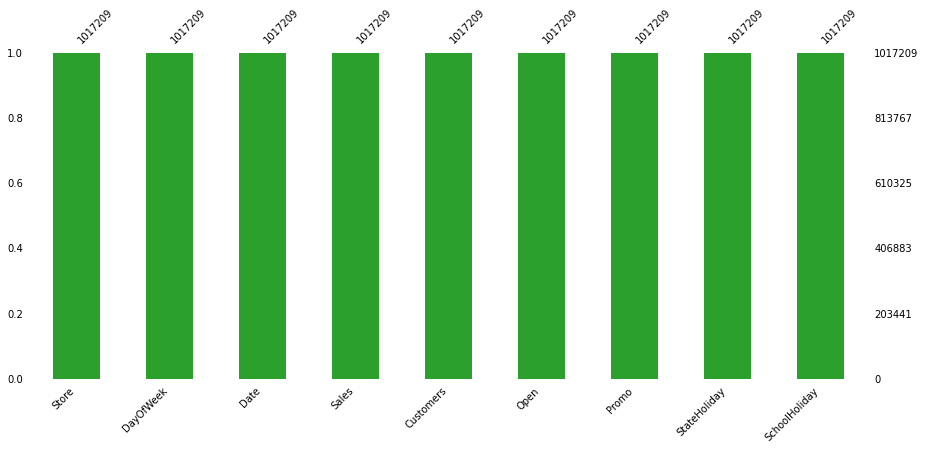

In [7]:
# Looking for Missing Values in sales_df
miss_val.bar(sales_df, figsize=(15,6), fontsize=10, labels=None, color='tab:green')

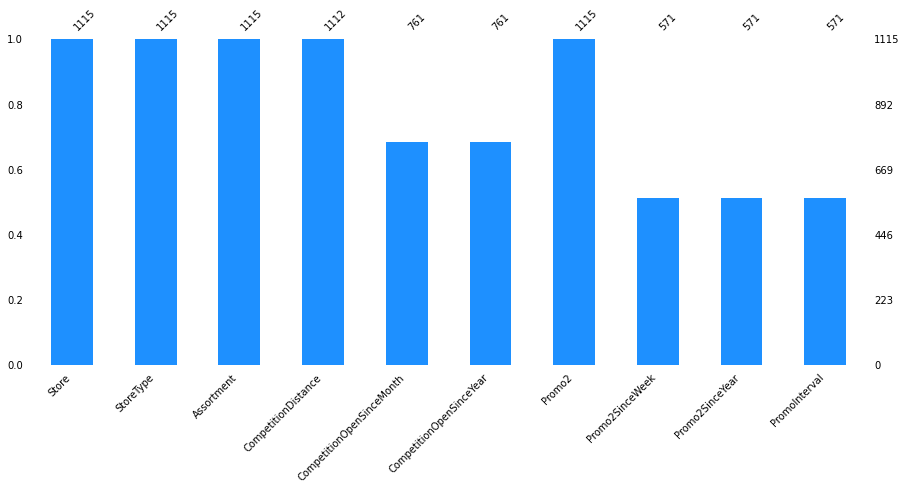

In [8]:
# Looking for Missing Values in store_df
miss_val.bar(store_df, figsize=(15,6),fontsize=10 , color='dodgerblue')

Text(0.5, 1.0, 'Distribution of Competition Distance')

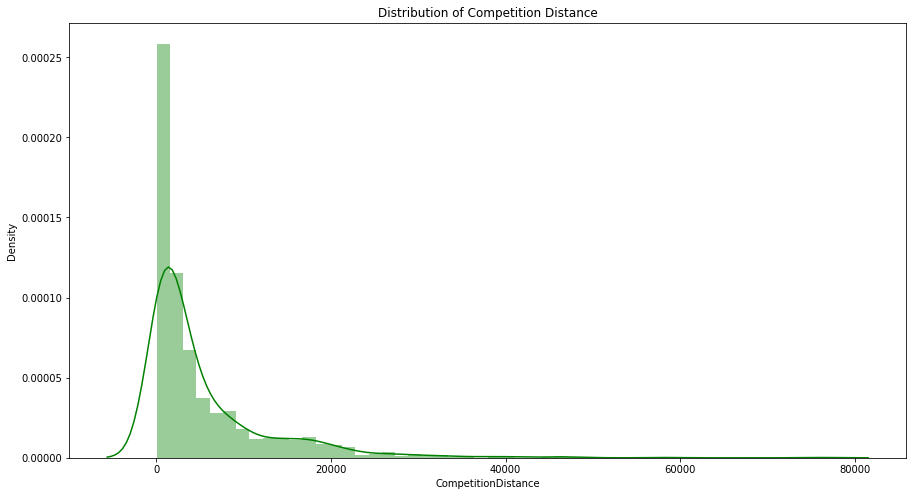

In [9]:
# Checking the distribution of Competition Distance feature in store_df
fig = plt.subplots(figsize = (15,8))
sns.distplot(store_df.CompetitionDistance.dropna(),color='g')
plt.title("Distribution of Competition Distance")

As the Distribution is right skewed. We can impute the missing values with Median of the feature

In [10]:
# Filling missing values in CompetitionDistance with median for the store_df dataset
store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

In [11]:
# Filling missing values in PromoInterval with zero for the store_df dataset
store_df.PromoInterval.fillna(value=0,inplace=True)

In [12]:
# Filling missing values in Promo2SinceWeek and Promo2SinceYear for the store_df dataset
store_df.Promo2SinceWeek.fillna(value=0,inplace=True)
store_df.Promo2SinceYear.fillna(value=0,inplace=True)

In [13]:
# Filling missing values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear
store_df.CompetitionOpenSinceMonth.fillna(value=0,inplace=True)
store_df.CompetitionOpenSinceYear.fillna(value=0,inplace=True)

In [14]:
# Final lookup for missing values in store_df
store_df.isnull().sum().reset_index()

index  0
0                      Store  0
1                  StoreType  0
2                 Assortment  0
3        CompetitionDistance  0
4  CompetitionOpenSinceMonth  0
5   CompetitionOpenSinceYear  0
6                     Promo2  0
7            Promo2SinceWeek  0
8            Promo2SinceYear  0
9              PromoInterval  0

## <b> - Merging two tables

In [15]:
# Merging two tables into one
ross_sales_data = pd.merge(sales_df, store_df, how='left', on='Store')
ross_sales_data.head()

Store  DayOfWeek  ... Promo2SinceYear    PromoInterval
0      1          5  ...             0.0                0
1      2          5  ...          2010.0  Jan,Apr,Jul,Oct
2      3          5  ...          2011.0  Jan,Apr,Jul,Oct
3      4          5  ...             0.0                0
4      5          5  ...             0.0                0

[5 rows x 18 columns]

## <b> - Transforming Depenedent Variable

Text(0.5, 1.0, 'Distribution of Sales')

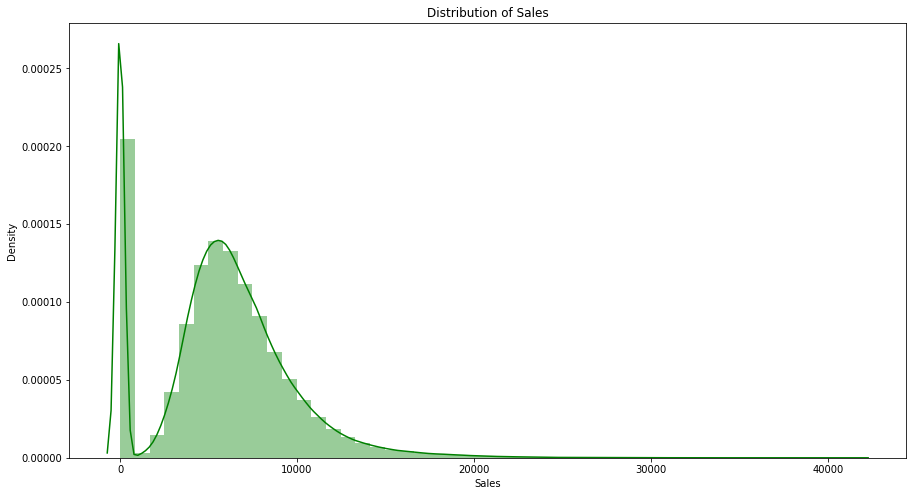

In [16]:
# Checking the distribution of sales
fig = plt.subplots(figsize = (15,8))
sns.distplot(ross_sales_data['Sales'],color='g')
plt.title("Distribution of Sales")

As we can able to notice that there is no sale when the store is closed. So we need to get rid of it too.

In [17]:
# Getting Rid of closed stores
ross_sales_data = ross_sales_data[ross_sales_data.Open != 0]
ross_sales_data = ross_sales_data.drop('Open', axis=1)

In [18]:
ross_sales_data[ross_sales_data.Sales == 0]['Store'].sum()
sales_df = ross_sales_data[ross_sales_data.Sales != 0]

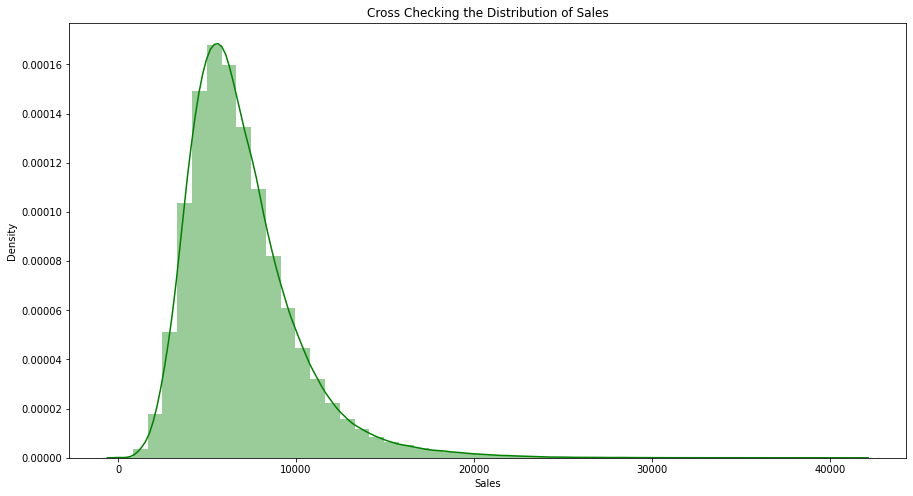

In [19]:
# Cross checking the sales feature to find any bias nature 
fig = plt.subplots(figsize = (15,8))
plt.title("Cross Checking the Distribution of Sales")
sns.distplot(ross_sales_data['Sales'],color='g')

## <b> - Transforming Independent Variables

In [20]:
# drop extra columns
ross_sales_data = ross_sales_data.drop(['Date'], axis=1)
print('Shape of structured sales_df: ',ross_sales_data.shape)
ross_sales_data.head()

Shape of structured sales_df:  (844392, 16)


Store  DayOfWeek  Sales  ...  Promo2SinceWeek  Promo2SinceYear    PromoInterval
0      1          5   5263  ...              0.0              0.0                0
1      2          5   6064  ...             13.0           2010.0  Jan,Apr,Jul,Oct
2      3          5   8314  ...             14.0           2011.0  Jan,Apr,Jul,Oct
3      4          5  13995  ...              0.0              0.0                0
4      5          5   4822  ...              0.0              0.0                0

[5 rows x 16 columns]

In [21]:
ross_sales_data.StateHoliday = ross_sales_data.StateHoliday.map({'0':0,'a':'ph','b':'eh','c':'ch'})

In [22]:
# converting number 0 to string 0
ross_sales_data.loc[ross_sales_data.StateHoliday == 0,'StateHoliday'] = ross_sales_data.loc[ross_sales_data.StateHoliday == 0,'StateHoliday'].astype(str)

# <b> Exploratory Data Analysis

---


#### <b> Correlation Analysis

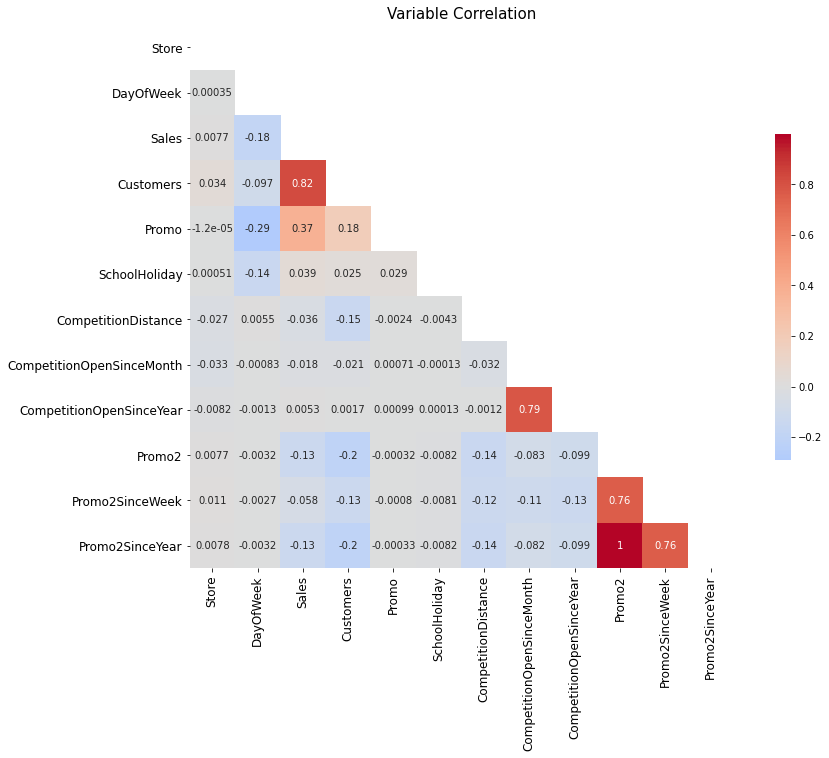

In [59]:
# Analysis of Correlation Factor between the Independent Variables
ross_sales_corr = ross_sales_data.corr()
mask = np.triu(np.ones_like(ross_sales_corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 10))
ax.tick_params(axis='both', which='major', labelsize=12)
hm = sns.heatmap(ross_sales_corr,mask = mask, cmap="coolwarm",center=0, square=True, annot=True,
            cbar_kws={"shrink": 0.6}).set_title('Variable Correlation', fontsize="15")

* <b> Comment : Correleation Matrix is used to know each feature in the datasets are correleated to each other feature. From the above correleation matrix it is obvious that "Customers" and "Sales" feature are much correleated to each other.

### <b> Variables Analysis

#### <b> - Store 
>  a unique Id for each store

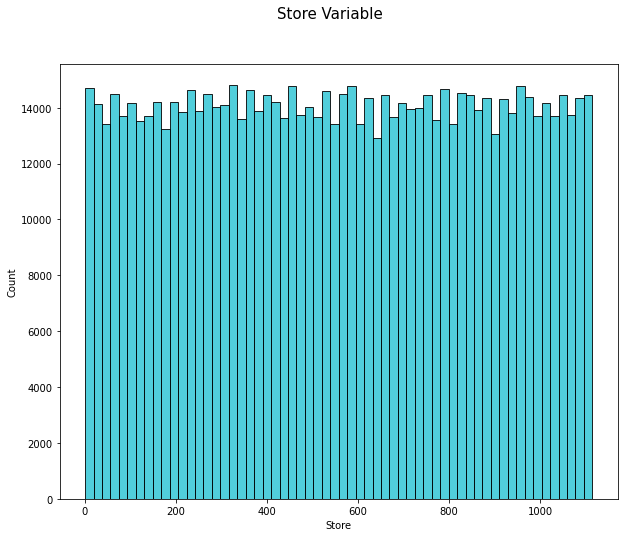

In [ ]:
# Looking on Store Variable
fig,ax = plt.subplots(figsize = (10,8))
Store = ross_sales_data.Store
fig.suptitle('Store Variable',fontsize=15)
sns.histplot(Store,bins=60,color='tab:cyan')

#### <b> - Day of Week

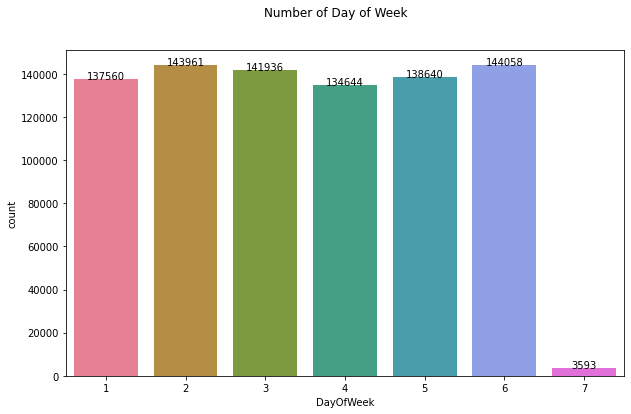

In [ ]:
# Looking at Day of Week Variable
fig,ax = plt.subplots(figsize = (10,6))
DayOfWeek = ross_sales_data.DayOfWeek
fig.suptitle('Number of Day of Week', fontsize=12)
ax = sns.countplot(DayOfWeek,palette = "husl")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> - Sales 
> the turnover for any given day

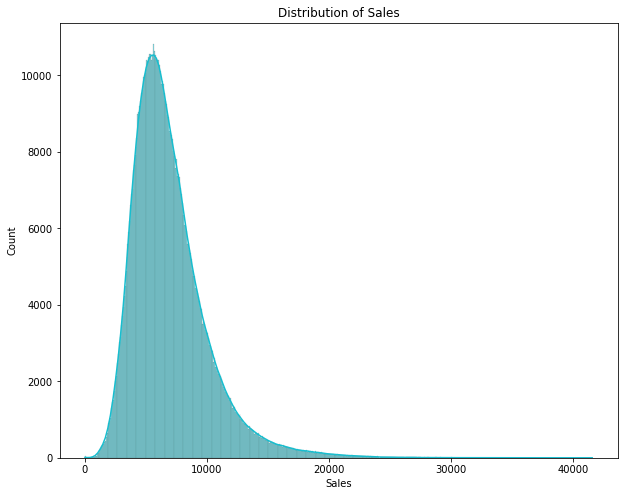

In [ ]:
# Looking the Sales feature  
fig = plt.subplots(figsize = (10,8))
plt.title("Distribution of Sales")
sns.histplot(ross_sales_data.Sales,kde=True,color='tab:cyan')

* <b> Comment : Sales data looks skewed toward right

#### <b> - Customers 
> the number of customers on a given day

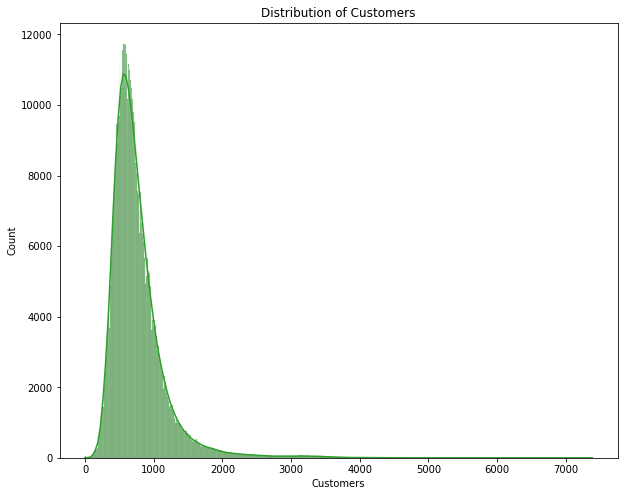

In [ ]:
# Looking the Customer feature  
fig = plt.subplots(figsize = (10,8))
plt.title("Distribution of Customers")
sns.histplot(ross_sales_data.Customers,kde=True,color='tab:green')

* <b> Comment : Customer data seems to be skewed rightward

#### <b> - Promo 
> indicates whether a store is running a promo on that day

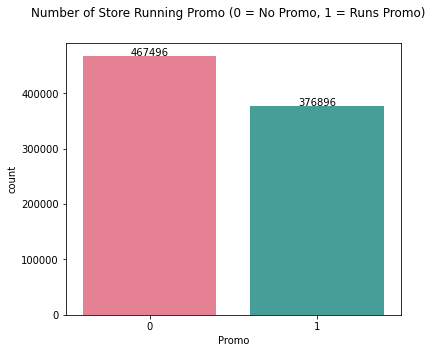

In [ ]:
# Looking at Promo Variable
fig,ax = plt.subplots(figsize = (6,5))
Promo = ross_sales_data.Promo
fig.suptitle('Number of Store Running Promo (0 = No Promo, 1 = Runs Promo)', fontsize=12)
ax = sns.countplot(Promo, palette = "husl")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

* <b> Comment : Stores running Promo is lesser than the stores not running promos

#### <b> - State Holiday 
> indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends.( ph = public holiday, eh = Easter holiday, ch = Christmas, 0 = None )

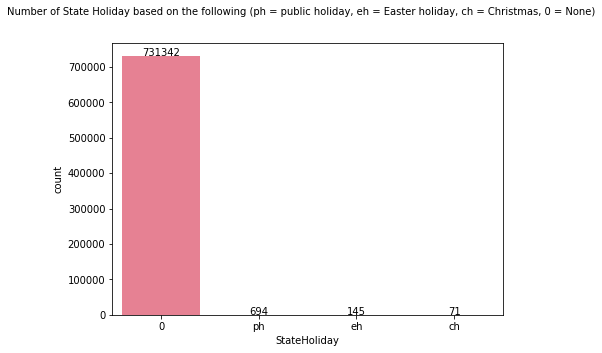

In [ ]:
# Looking into Nature of State Holiday Feature
fig,ax = plt.subplots(figsize = (7,5))
StateHoliday = ross_sales_data.StateHoliday
fig.suptitle('Number of State Holiday based on the following (ph = public holiday, eh = Easter holiday, ch = Christmas, 0 = None)', fontsize=10)
ax = sns.countplot(StateHoliday,palette = "husl")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> - School Holiday 
> indicates if the (Store, Date) was affected by the closure of public schools

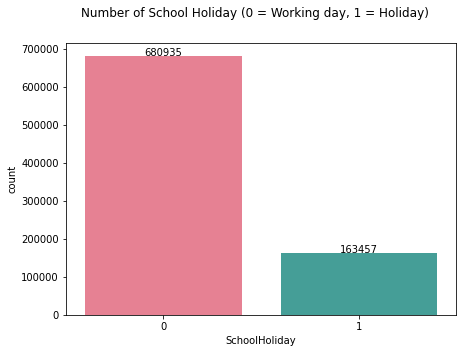

In [ ]:
# Looking into Nature of SchoolHoliday Feature
fig,ax = plt.subplots(figsize = (7,5))
SchoolHoliday = ross_sales_data.SchoolHoliday
fig.suptitle('Number of School Holiday (0 = Working day, 1 = Holiday)', fontsize=12)
ax = sns.countplot(SchoolHoliday,palette = "husl")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> - Store Type 
> differentiates between 4 different store models: a, b, c, d

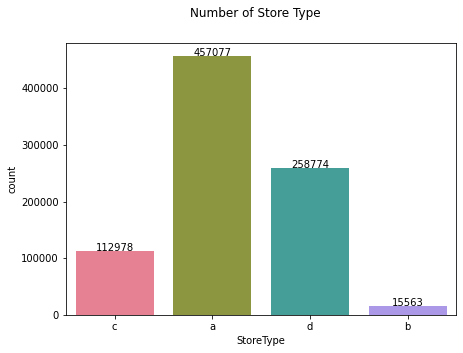

In [ ]:
# Looking into Nature of Store Type Feature
fig,ax = plt.subplots(figsize = (7,5))
StoreType = ross_sales_data.StoreType
fig.suptitle('Number of Store Type', fontsize=12)
ax = sns.countplot(StoreType,palette = "husl")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> - Assortment 
> describes an assortment level: a = basic, b = extra, c = extended



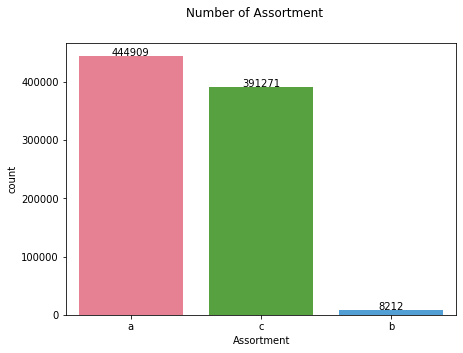

In [ ]:
# Looking into Nature of Assortment Feature
fig,ax = plt.subplots(figsize = (7,5))
Assortment = ross_sales_data.Assortment
fig.suptitle('Number of Assortment', fontsize=12)
ax = sns.countplot(Assortment,palette = "husl")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> - Competition Distance
> distance in meters to the nearest competitor store



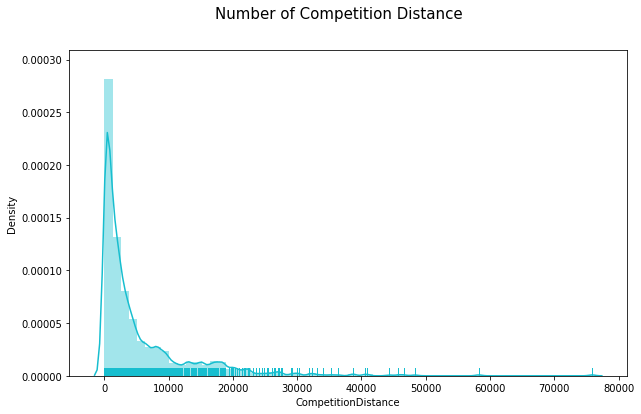

In [ ]:
# Looking into the nature of Competition Distance Feature
fig,ax = plt.subplots(figsize = (10,6))
CompetitionDistance = ross_sales_data.CompetitionDistance
fig.suptitle('Number of Competition Distance', fontsize=15)
ax = sns.distplot(CompetitionDistance,color = 'tab:cyan',bins=60,hist=True,rug=True)

#### <b> - CompetitionOpenSinceMonth
> Gives the approximate month of the time the nearest competitor was opened

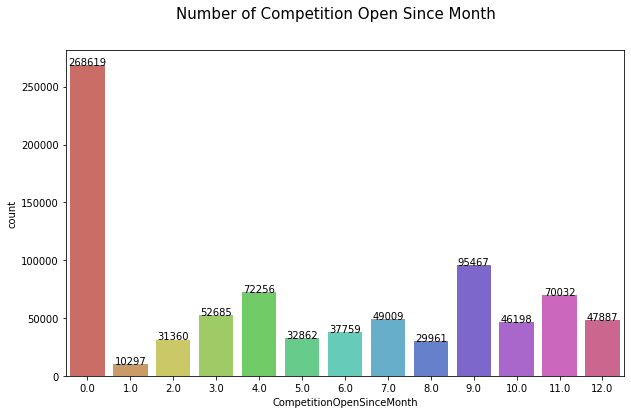

In [60]:
# Looking into Nature of Competition Open Since Month Feature
fig,ax = plt.subplots(figsize = (10,6))
CompetitionOpenSinceMonth = ross_sales_data.CompetitionOpenSinceMonth
fig.suptitle('Number of Competition Open Since Month', fontsize=15)
ax = sns.countplot(CompetitionOpenSinceMonth,palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> - CompetitionOpenSinceYear
> Gives the approximate year of the time the nearest competitor was opened

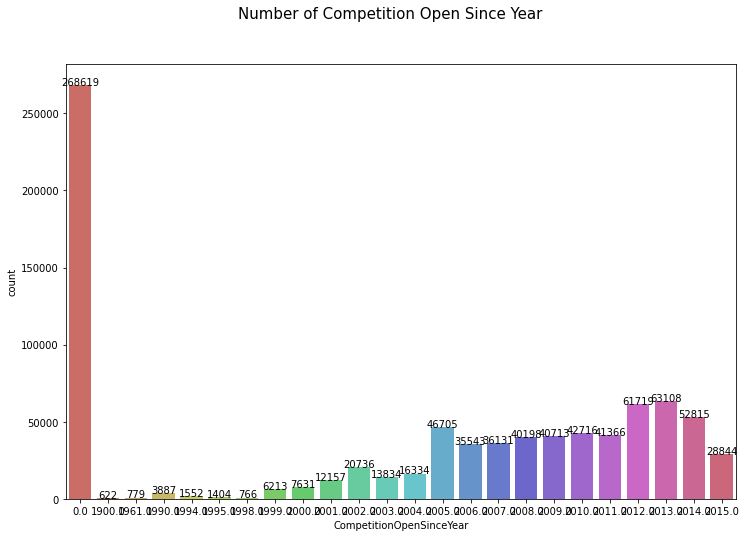

In [61]:
# Looking into Nature of Competition Open Since Year Feature
fig,ax = plt.subplots(figsize = (12,8))
CompetitionOpenSinceYear = ross_sales_data.CompetitionOpenSinceYear
fig.suptitle('Number of Competition Open Since Year', fontsize=15)
ax = sns.countplot(CompetitionOpenSinceYear,palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> - Promo 2

> Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating




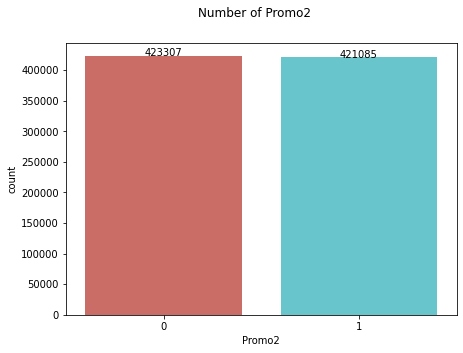

In [ ]:
# Looking into Nature of Promo2 Feature
fig,ax = plt.subplots(figsize = (7,5))
Promo2 = ross_sales_data.Promo2
fig.suptitle('Number of Promo2', fontsize=12)
ax = sns.countplot(Promo2,palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b>- Promo2SinceWeek
> Describes the calendar week when the store started participating in Promo2

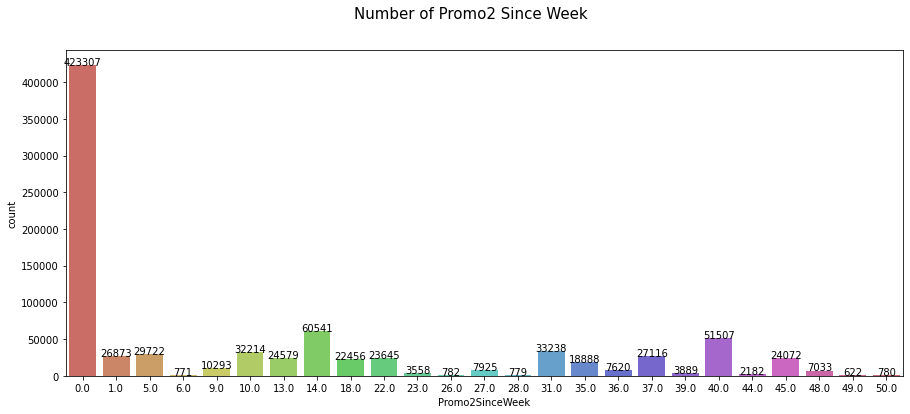

In [62]:
# Looking into Nature of Promo2SinceWeek Feature
fig,ax = plt.subplots(figsize = (15,6))
Promo2SinceWeek = ross_sales_data.Promo2SinceWeek
fig.suptitle('Number of Promo2 Since Week', fontsize=15)
ax = sns.countplot(Promo2SinceWeek,palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> - Promo2SinceYear
> Describes the year when the store started participating in Promo2

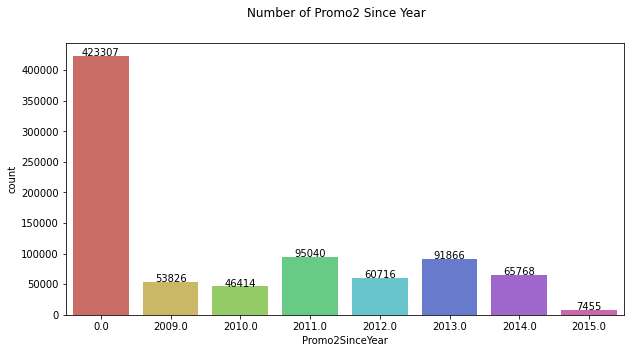

In [63]:
# Looking into Nature of Promo2SinceYear Feature
fig,ax = plt.subplots(figsize = (10,5))
Promo2SinceYear = ross_sales_data.Promo2SinceYear
fig.suptitle('Number of Promo2 Since Year', fontsize=12)
ax = sns.countplot(Promo2SinceYear,palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> - PromoInterval
> Describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

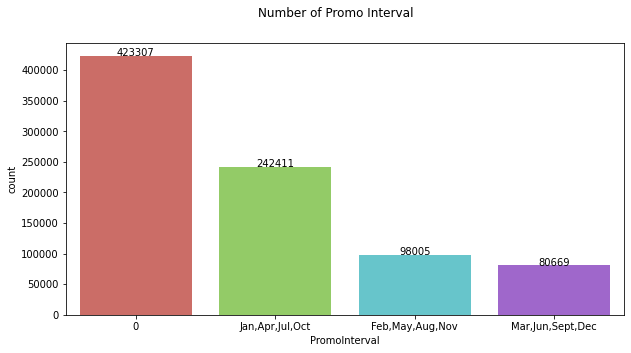

In [ ]:
# Looking into Nature of Promo Interval Feature
fig,ax = plt.subplots(figsize = (10,5))
PromoInterval = ross_sales_data.PromoInterval
fig.suptitle('Number of Promo Interval', fontsize=12)
ax = sns.countplot(PromoInterval,palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

### <b> Sales vs Customers

#### <b> - Store

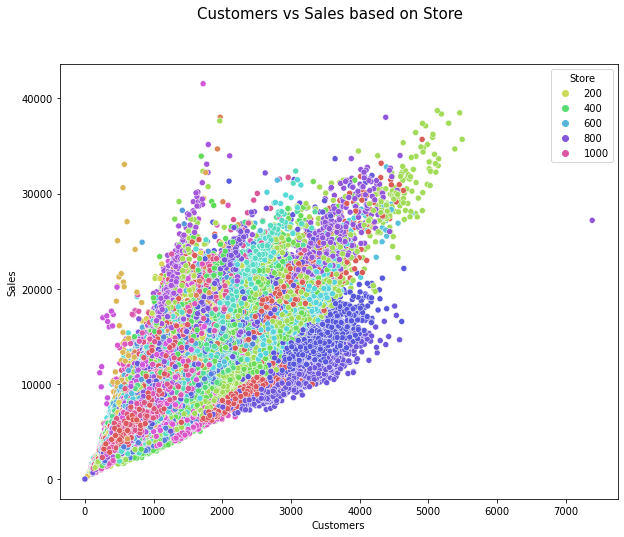

In [ ]:
# Looking the Store feature  
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customers vs Sales based on Store', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='Customers',y='Sales',hue='Store',palette='hls')

#### <b> - Day of Week

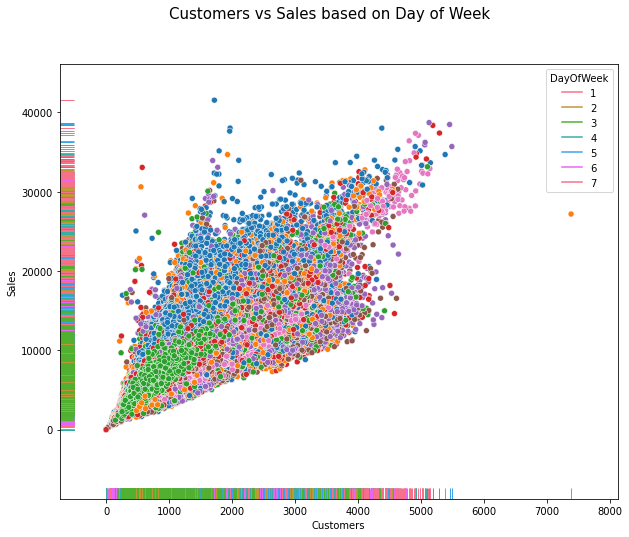

In [ ]:
# Day of Week
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customers vs Sales based on Day of Week', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='Customers',y='Sales',hue='DayOfWeek',palette='tab10')
sns.rugplot(data=ross_sales_data, x='Customers', y='Sales', hue='DayOfWeek',palette='husl')

* <b> Comment : No.of.Sales and no.of.customer on 3rd Day of Week are higher. 

#### <b> - Promo

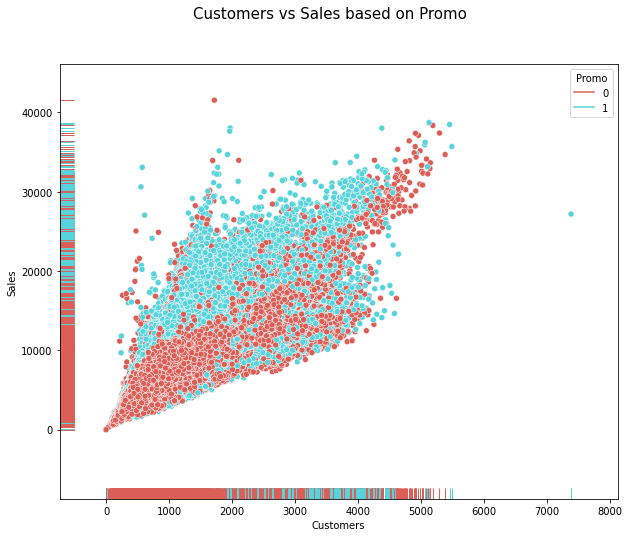

In [ ]:
# Promo
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customers vs Sales based on Promo', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='Customers',y='Sales',hue='Promo',palette='hls')
sns.rugplot(data=ross_sales_data, x='Customers', y='Sales', hue='Promo',palette='hls')

* <b>Comment : No of sales are higher for Non-Promo Store. But Promo1 helped increase the volume of sales.  

#### <b> - State Holiday

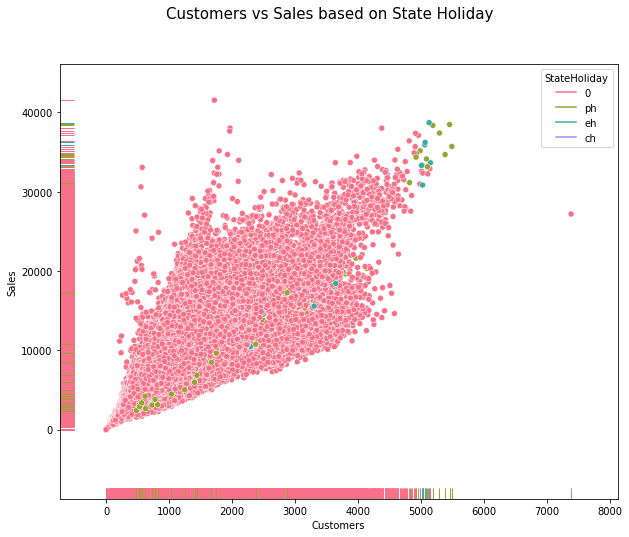

In [ ]:
# State Holiday
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customers vs Sales based on State Holiday', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='Customers',y='Sales',hue='StateHoliday',palette='husl')
sns.rugplot(data=ross_sales_data, x='Customers', y='Sales', hue='StateHoliday',palette='husl')

#### <b> - School Holiday

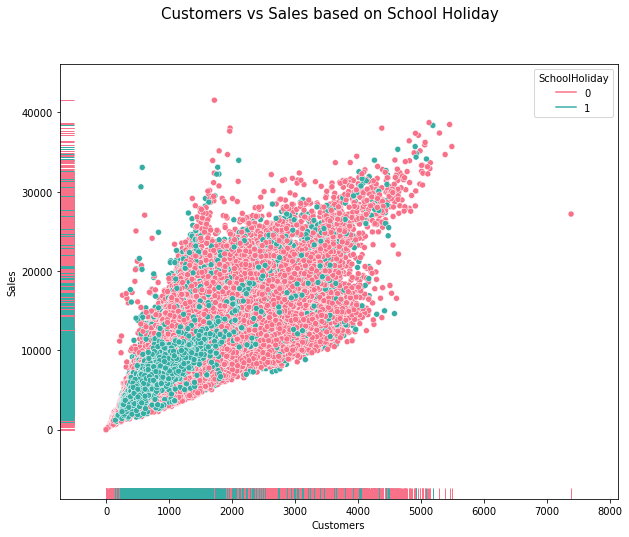

In [ ]:
# School Holiday
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customers vs Sales based on School Holiday', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='Customers',y='Sales',hue='SchoolHoliday',palette='husl')
sns.rugplot(data=ross_sales_data, x='Customers', y='Sales', hue='SchoolHoliday',palette='husl')

* <b> Comment : Volume of sales increased on School Holiday

#### <b> - Store Type

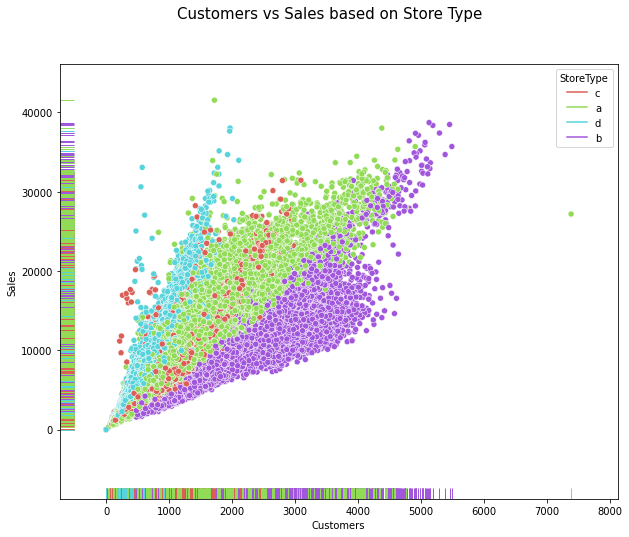

In [ ]:
# Store Type
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customers vs Sales based on Store Type', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='Customers',y='Sales',hue ='StoreType',palette='hls')
sns.rugplot(data=ross_sales_data, x='Customers', y='Sales', hue='StoreType',palette='hls')

* <b> Comment : Store type "b" and "a" had contributed more for Sales

#### <b> - Assortment

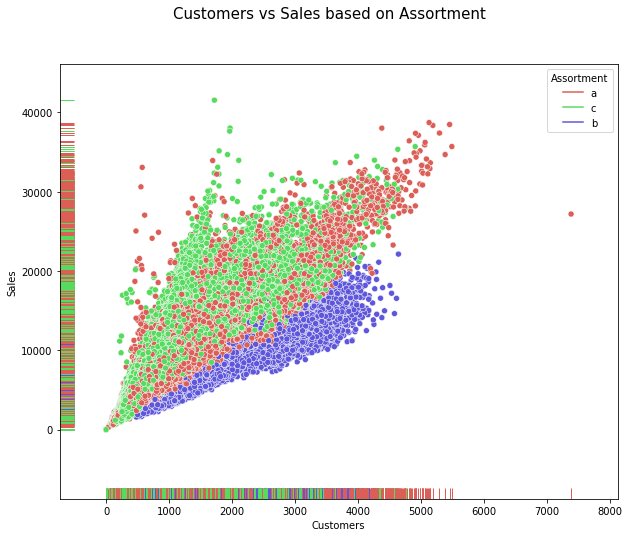

In [ ]:
# Assortment
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customers vs Sales based on Assortment', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='Customers',y='Sales',hue = 'Assortment',palette='hls')
sns.rugplot(data=ross_sales_data, x='Customers', y='Sales', hue='Assortment',palette='hls')

#### <b> - Competition Distance

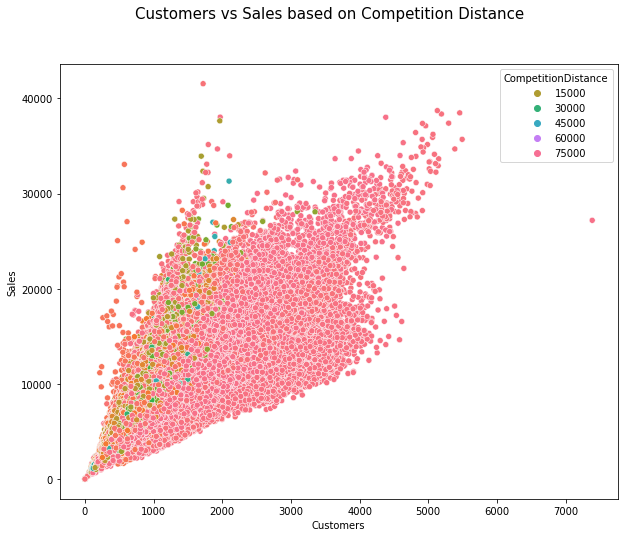

In [ ]:
# Competition Distance
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customers vs Sales based on Competition Distance', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='Customers',y='Sales',hue='CompetitionDistance',palette='husl')

#### <b> - Competition Open Since Month

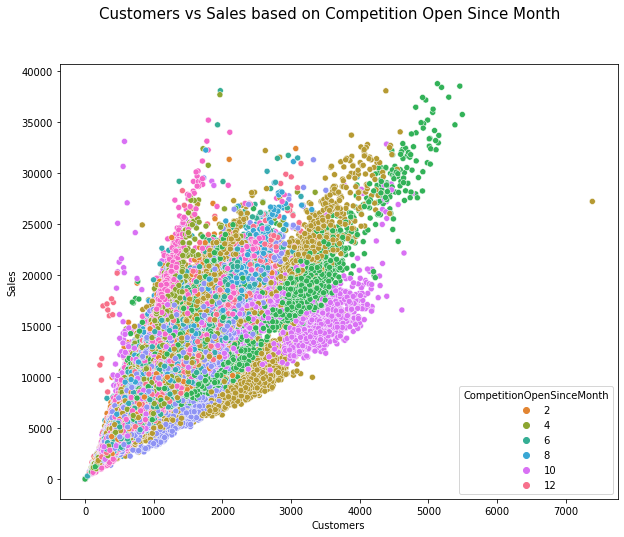

In [ ]:
# Competition Open Since Month
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customers vs Sales based on Competition Open Since Month', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='Customers',y='Sales',hue='CompetitionOpenSinceMonth',palette='husl')

#### <b> - Competition Open Since Year

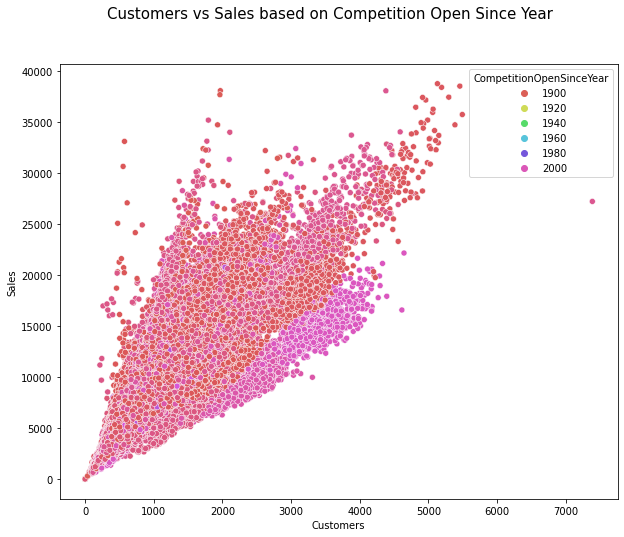

In [ ]:
# Competition Open Since Month
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customers vs Sales based on Competition Open Since Year', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='Customers',y='Sales',hue='CompetitionOpenSinceYear',palette='hls')

#### <b> - Promo 2

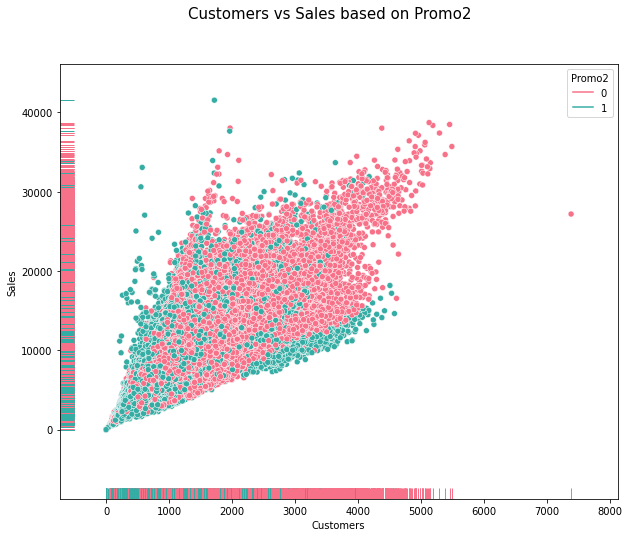

In [ ]:
# Promo2
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customers vs Sales based on Promo2', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='Customers',y='Sales',hue='Promo2',palette='husl')
sns.rugplot(data=ross_sales_data, x='Customers', y='Sales', hue='Promo2',palette='husl')

#### <b> - Promo 2 Since Week

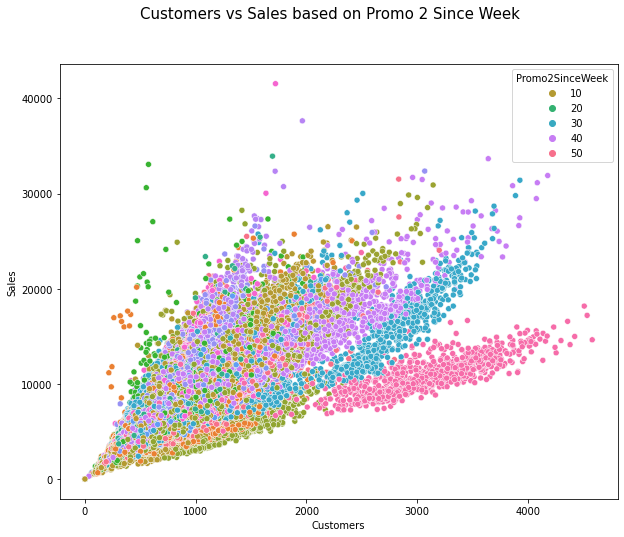

In [ ]:
# Promo 2 Since Week
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customers vs Sales based on Promo 2 Since Week', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='Customers',y='Sales',hue='Promo2SinceWeek',palette='husl')

#### <b> - Promo 2 Since Year

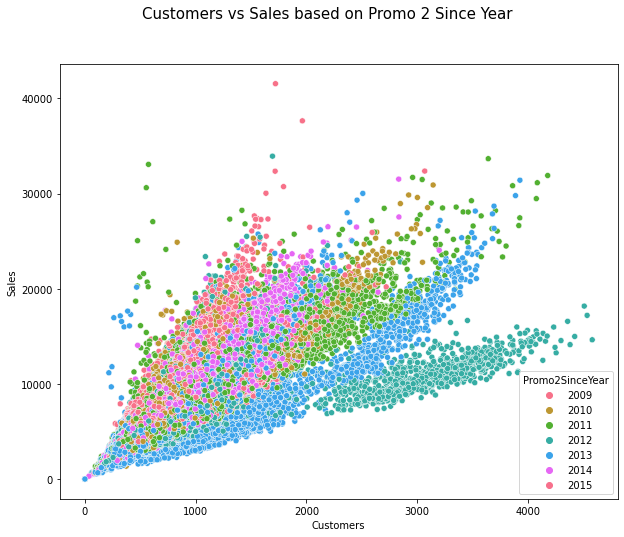

In [ ]:
# Promo 2 Since Year
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customers vs Sales based on Promo 2 Since Year ', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='Customers',y='Sales',hue='Promo2SinceYear',palette='husl')

#### <b>- Promo Interval

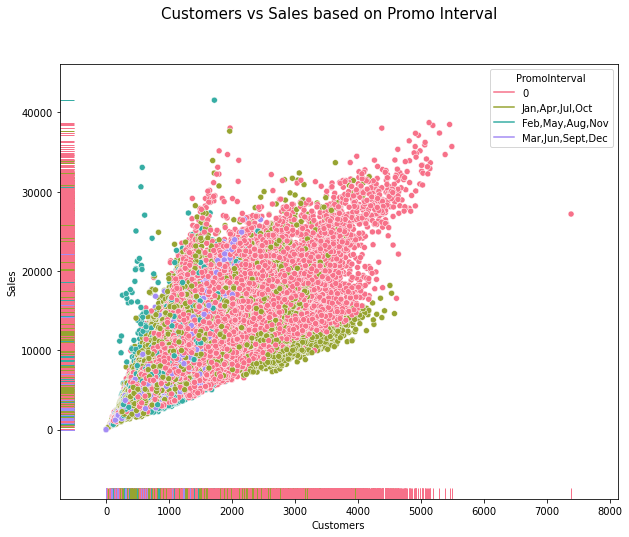

In [ ]:
# Promo Interval
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customers vs Sales based on Promo Interval', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='Customers',y='Sales',hue='PromoInterval',palette='husl')
sns.rugplot(data=ross_sales_data,x='Customers',y='Sales',hue='PromoInterval',palette='husl')

### <b> Weekly Sales Analysis

#### <b> - Promo

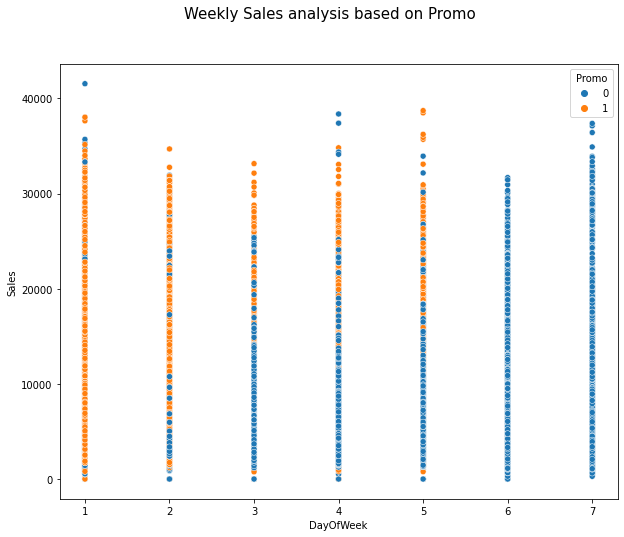

In [ ]:
# Looking Weekly Sales Based on Promo
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Weekly Sales analysis based on Promo',fontsize=15)
sns.scatterplot(data=ross_sales_data,x='DayOfWeek',y='Sales',hue='Promo')

#### <b> - Promo 2

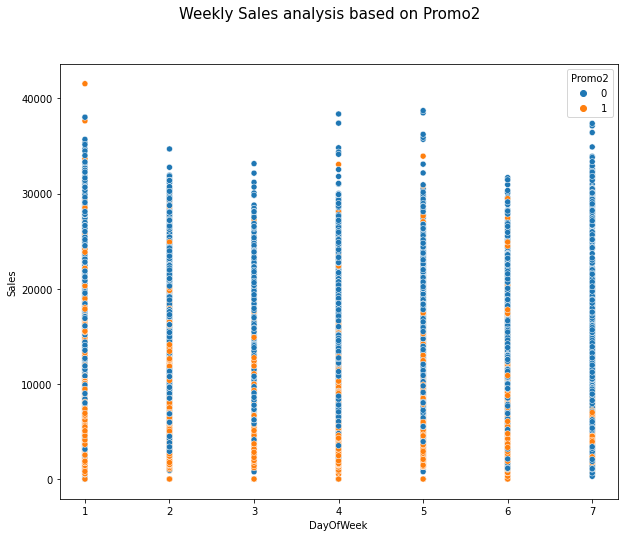

In [ ]:
# Looking Weekly Sales Based on Promo2
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Weekly Sales analysis based on Promo2',fontsize=15)
sns.scatterplot(data=ross_sales_data,x='DayOfWeek',y='Sales',hue='Promo2')

#### <b> - Store Type

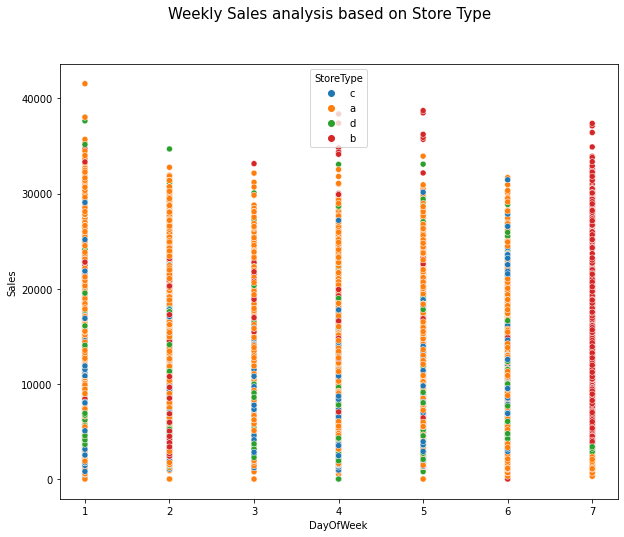

In [ ]:
# Looking Weekly Sales Based on Store Type
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Weekly Sales analysis based on Store Type',fontsize=15)
sns.scatterplot(data=ross_sales_data,x='DayOfWeek',y='Sales',hue='StoreType')

#### <b> - Assortment

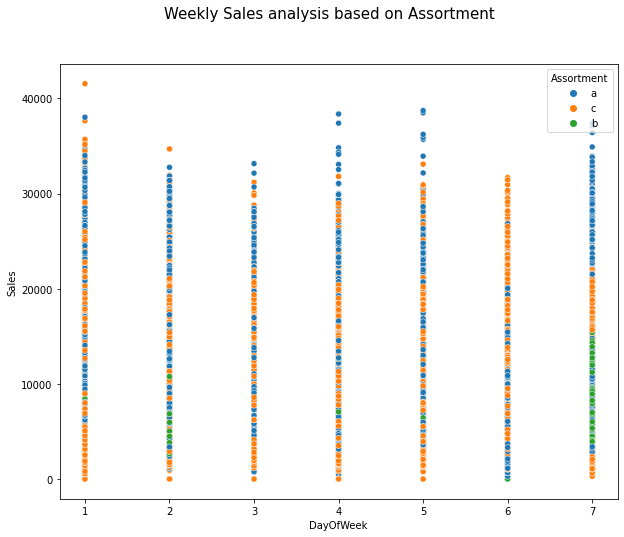

In [ ]:
# Looking Weekly Sales Based on Assortment
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Weekly Sales analysis based on Assortment',fontsize=15)
sns.scatterplot(data=ross_sales_data,x='DayOfWeek',y='Sales',hue='Assortment')

### <b> Customer Base Analysis

#### <b> - Customer based on Storetype and Assortment

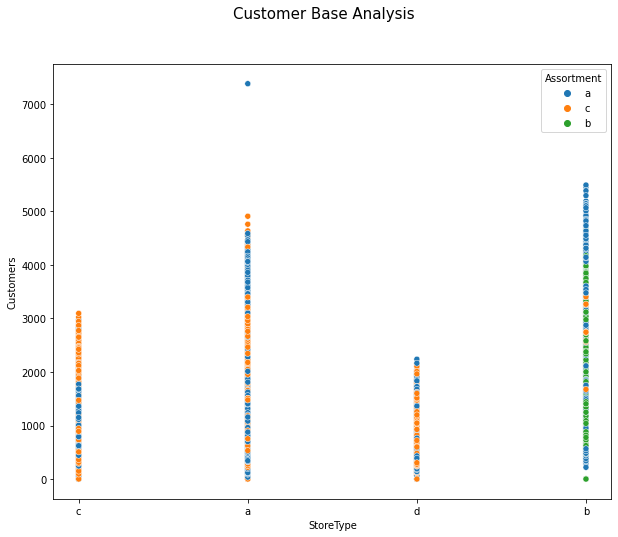

In [ ]:
# Looking Customer Base
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customer Base Analysis',fontsize=15)
sns.scatterplot(data=ross_sales_data,x='StoreType',y='Customers',hue='Assortment')

#### <b> - Customers based on Competition Distance

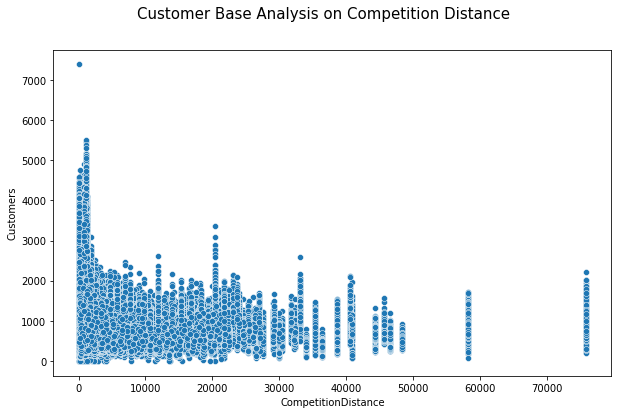

In [ ]:
# Looking Customer Base
fig,ax = plt.subplots(figsize = (10,6))
fig.suptitle('Customer Base Analysis on Competition Distance',fontsize=15)
sns.scatterplot(data=ross_sales_data,x='CompetitionDistance',y='Customers',palette='hls')

#### <b> - Customers based on School Holiday with Promo

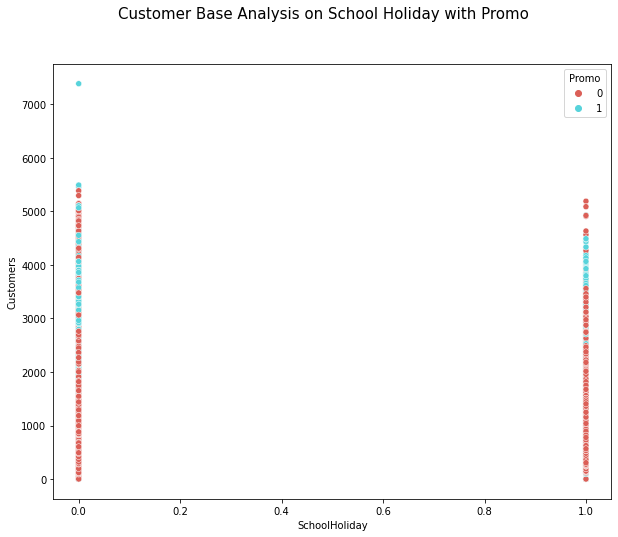

In [ ]:
# Looking Customer Base
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customer Base Analysis on School Holiday with Promo',fontsize=15)
sns.scatterplot(data=ross_sales_data,x='SchoolHoliday',y='Customers',hue='Promo',palette='hls')

#### <b> - Customers based on School Holiday with Promo 2

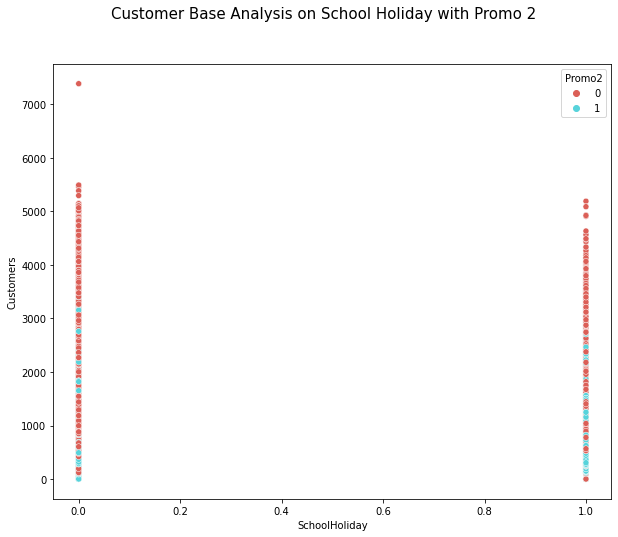

In [ ]:
# Looking Customer Base
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customer Base Analysis on School Holiday with Promo 2',fontsize=15)
sns.scatterplot(data=ross_sales_data,x='SchoolHoliday',y='Customers',hue='Promo2',palette='hls')

#### <b> - Customers based on State Holiday with Promo

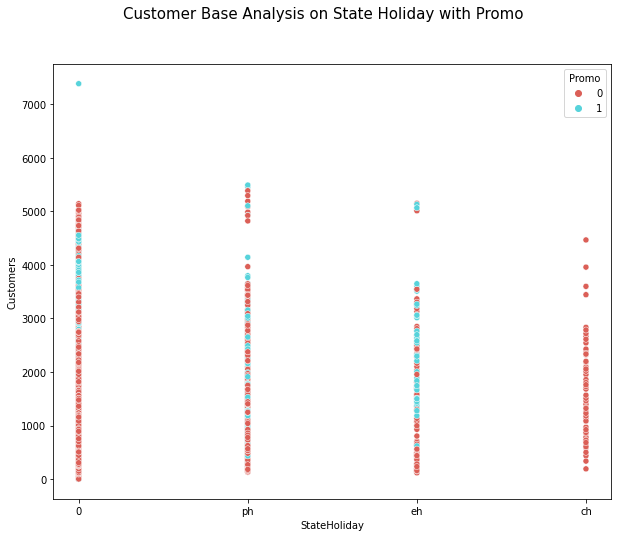

In [ ]:
# Looking Customer Base
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customer Base Analysis on State Holiday with Promo',fontsize=15)
sns.scatterplot(data=ross_sales_data,x='StateHoliday',y='Customers',hue='Promo',palette='hls')

#### <b> - Customers based on State Holiday with Promo 2

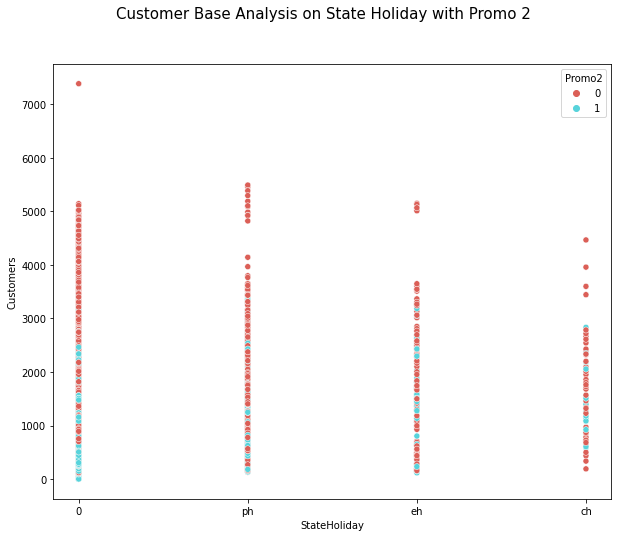

In [ ]:
# Looking Customer Base
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Customer Base Analysis on State Holiday with Promo 2',fontsize=15)
sns.scatterplot(data=ross_sales_data,x='StateHoliday',y='Customers',hue='Promo2',palette='hls')

### <b> Sales Base Analysis

#### <b> - Sales based on Store type and Assortment

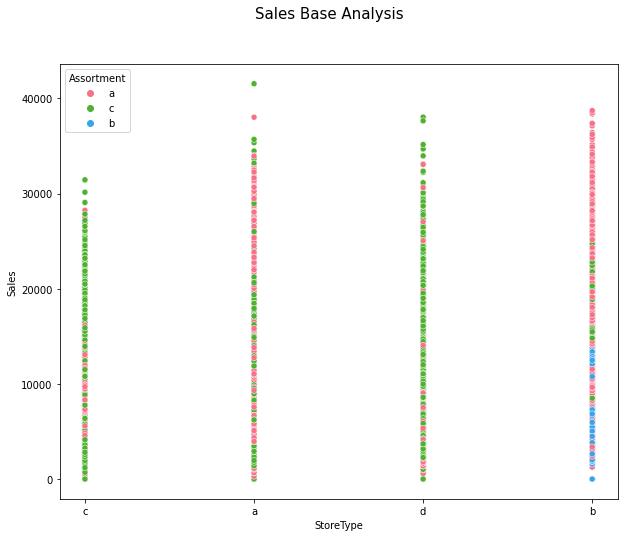

In [ ]:
# Looking Sales
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Sales Base Analysis',fontsize=15)
sns.scatterplot(data=ross_sales_data,x='StoreType',y='Sales',hue='Assortment',palette='husl')

#### <b> - Sales based on Competition Distance 

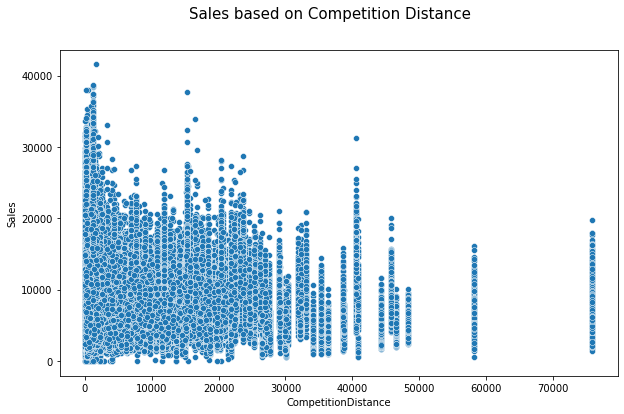

In [ ]:
# Looking at Sales based on Competition Distance
fig,ax = plt.subplots(figsize = (10,6))
fig.suptitle('Sales based on Competition Distance', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='CompetitionDistance',y='Sales',palette='hls')

#### <b> - Sales based on School Holiday with Promo

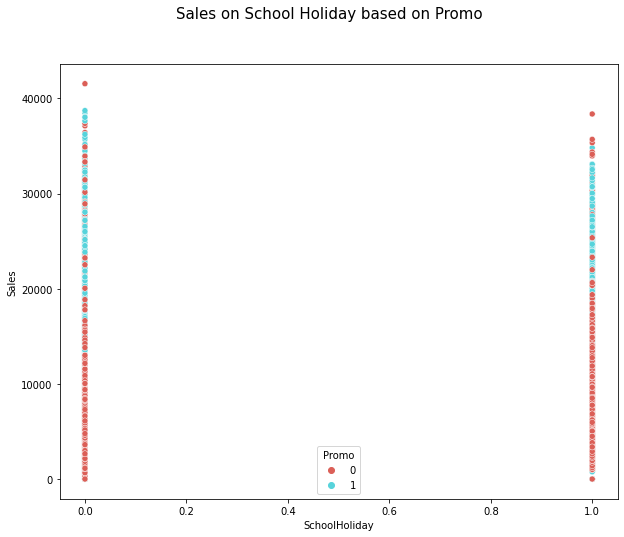

In [ ]:
# Looking at Sales on School Holiday based on Promo
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Sales on School Holiday based on Promo', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='SchoolHoliday',y='Sales',hue='Promo',palette='hls')

#### <b> - Sales based on School Holiday with Promo 2

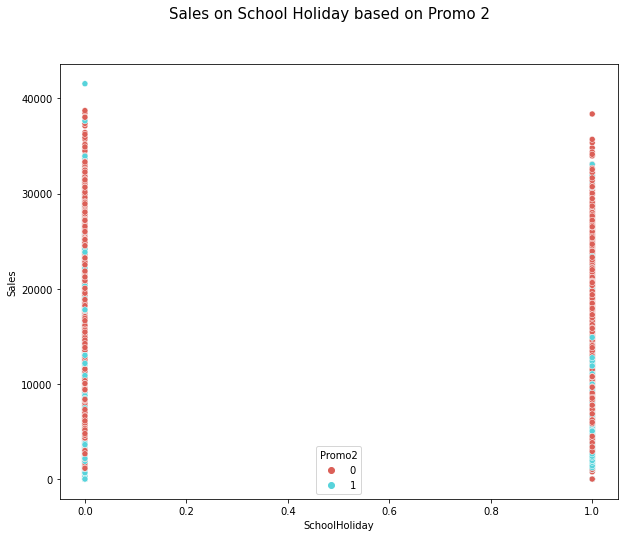

In [ ]:
# Looking at Sales on School Holiday based on Promo 2
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Sales on School Holiday based on Promo 2', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='SchoolHoliday',y='Sales',hue='Promo2',palette='hls')

#### <b> - Sales on State Holiday with Promo

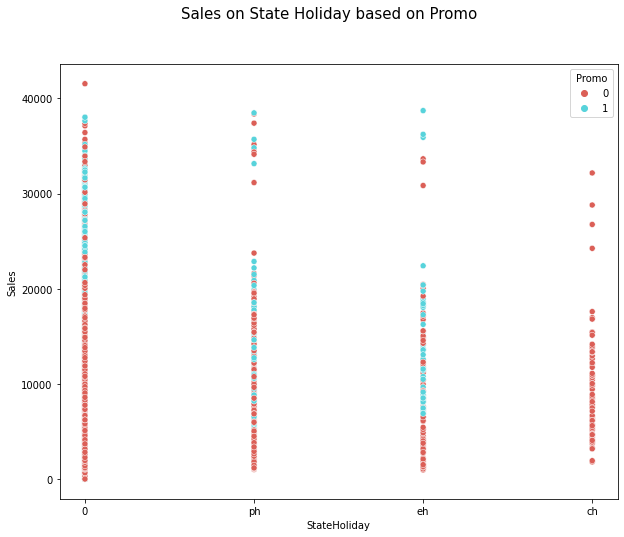

In [ ]:
# Looking at Sales on State Holiday based on Promo
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Sales on State Holiday based on Promo', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='StateHoliday',y='Sales',hue='Promo',palette='hls')

#### <b> - Sales on State Holiday with Promo 2

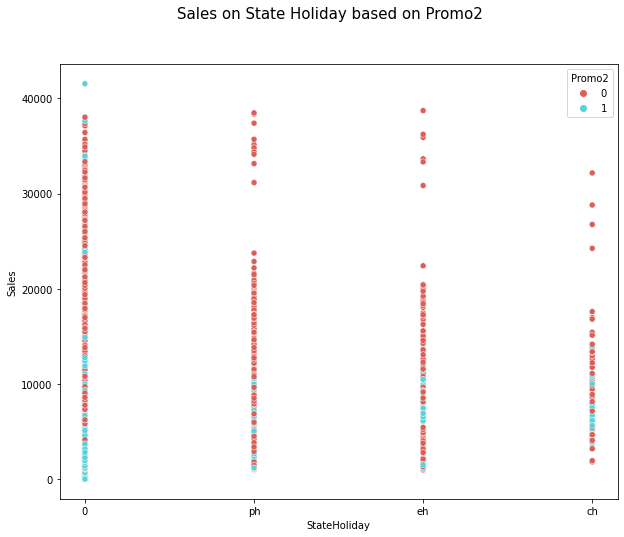

In [ ]:
# Looking at Sales on State Holiday based on Promo2
fig,ax = plt.subplots(figsize = (10,8))
fig.suptitle('Sales on State Holiday based on Promo2', fontsize=15)
sns.scatterplot(data=ross_sales_data,x='StateHoliday',y='Sales',hue='Promo2',palette='hls')

# <b> Preprocessing

---

#### <b> - Data Imputation

In [23]:
# Removing highest number of missing values from the ross_sales_data dataset
ross_sales_data = ross_sales_data.drop(['Store'],axis=1)

#### <b> - One Hot Encoding

In [24]:
# One Hot Encoding - Encoding discrete variables
ross_sales_data = pd.get_dummies(ross_sales_data)

#### <b> - Train Test Split

In [25]:
# Splitting the datasets into two as Train and Test 
X_train, X_test, y_train, y_test = train_test_split(ross_sales_data.drop('Sales', axis=1),ross_sales_data['Sales'],test_size=0.3,random_state=20) 

X_train.shape, X_test.shape
print('Shape of training dataset is',X_train.shape ,'\nShape of testing dataset is',X_test.shape)

Shape of training dataset is (591074, 25) 
Shape of testing dataset is (253318, 25)


#### <b> - Standardizing

In [26]:
# Standardizing the dataset to avoid any bias in data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# <b> Modelling - Machine Learning Approach

---

### <b>1. Linear Regression

#### <b> - Model Fitting

In [27]:
# Linear Regression Model
Linreg = LinearRegression().fit(X_train_std, y_train)
print('Training Dataset is successfully fitted in Linear Regression Model')

Training Dataset is successfully fitted in Linear Regression Model


#### <b> - Predicting

In [28]:
# Predicting using testing dataset
y_lin_predicted = Linreg.predict(X_train_std)
y_lintest_predicted = Linreg.predict(X_test_std)
print('Linear Regression Model is successfully predicted using testing dataset')

Linear Regression Model is successfully predicted using testing dataset


#### <b> - Evaluation Score

In [29]:
# Train and Test Score
lr_Train_Score = Linreg.score(X_train_std,y_train)
lr_Test_Score = Linreg.score(X_test_std,y_test)
print('Training Score : ', lr_Train_Score,";","Testing Score :", lr_Test_Score)

# Mean Absolute Error
lr_MAE_Train = mean_absolute_error((y_train),(y_lin_predicted))
lr_MAE_Test = mean_absolute_error((y_test), (y_lintest_predicted))
print("Training MAE :" ,lr_MAE_Train,";","Testing MAE :",lr_MAE_Test)

# Mean Squared Error
lr_MSE_Train = mean_squared_error((y_train),(y_lin_predicted))
lr_MSE_Test  = mean_squared_error((y_test), (y_lintest_predicted))
print("Training MSE :" ,lr_MSE_Train,";","Testing MSE :",lr_MSE_Test)

# Root Mean Squared Error
lr_RMSE_Train = np.sqrt(lr_MSE_Train) 
lr_RMSE_Test = np.sqrt(lr_MSE_Test)
print("Training RMSE :" ,lr_RMSE_Train,";","Testing RMSE :",lr_RMSE_Test)

# Root Mean Squared Log Error
lr_RMSLE_Train = np.log(lr_RMSE_Train)
lr_RMSLE_Test = np.log(lr_RMSE_Test)
print("Training RMSLE :" ,lr_RMSLE_Train,";","Testing RMSLE :",lr_RMSLE_Test)

# R2 Score
lr_r2_Train = r2_score((y_train),(y_lin_predicted))
lr_r2_Test = r2_score((y_test), (y_lintest_predicted))
print("Training r2 :" ,lr_r2_Train,";","Testing r2 :",lr_r2_Test)

Training Score :  0.824566271326201 ; Testing Score : 0.8254509967252199
Training MAE : 942.9208905105423 ; Testing MAE : 943.4538101003623
Training MSE : 1688445.5322444378 ; Testing MSE : 1686749.182308823
Training RMSE : 1299.4019902418333 ; Testing RMSE : 1298.7490836604363
Training RMSLE : 7.169659430107435 ; Testing RMSLE : 7.169156836858183
Training r2 : 0.824566271326201 ; Testing r2 : 0.8254509967252199


In [30]:
lin_model_scores = [{'ML Model':'Linear Regression',
                     'Training Score' :  lr_Train_Score.round(2), 'Testing Score' : lr_Test_Score.round(2), 
                     'Training MAE' : lr_MAE_Train.round(2), 'Testing MAE' : lr_MAE_Test.round(2), 
                     'Training MSE' : lr_MSE_Train.round(2),'Testing MSE' : lr_MSE_Test.round(2),
                     'Training RMSE' : lr_RMSE_Train.round(2),'Testing RMSE': lr_RMSE_Test.round(2),
                     'Training RMSLE' : lr_RMSLE_Train.round(2),'Testing RMSLE': lr_RMSLE_Test.round(2),
                     'Training r2' : lr_r2_Train.round(2),'Testing r2' : lr_r2_Test.round(2)}]

In [31]:
eval_score = pd.DataFrame(data=lin_model_scores)

#### <b> Visualizing Performance of Linear Regression Model

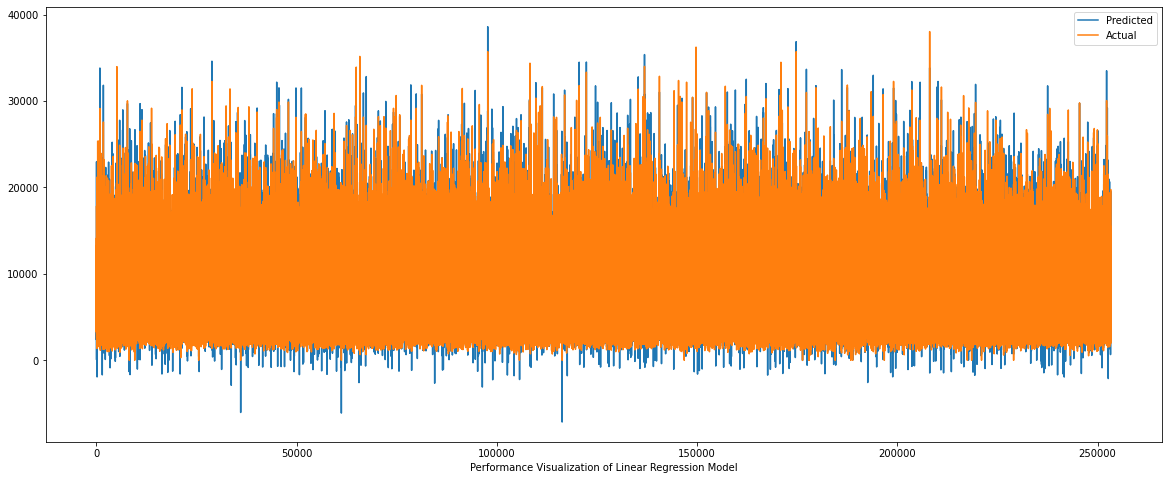

In [32]:
# Visualizing the Actual vs Predicted Values
plt.figure(figsize=(20,8))
plt.plot((y_lintest_predicted))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('Performance Visualization of Linear Regression Model')
plt.show()

### <b> 2. Lasso Regression

#### <b> - Model Fitting

In [102]:
# Lasso Regression with Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20]}
lasso_regressor = RandomizedSearchCV(lasso, parameters,n_jobs=-1, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train_std, y_train)
print('Training Dataset is successfully fitted in Lasso Regression Model')

Training Dataset is successfully fitted in Lasso Regression Model


In [103]:
# Looking into best fit value
lasso_Optimal_model = lasso_regressor.best_estimator_
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-13}

Using  {'alpha': 1e-13}  the negative mean squared error is:  -1691966.2641710273


#### <b> - Predicting

In [104]:
# Predicting using test dataset
y_lasso_predicted = lasso_Optimal_model.predict(X_train_std)
y_lassotest_predicted = lasso_Optimal_model.predict(X_test_std)
print('Lasso Regression Model is successfully predicted using testing dataset')

Lasso Regression Model is successfully predicted using testing dataset


#### <b> - Evaluation Score

In [105]:
# Train and Test Score
lassoTrain_Score = lasso_Optimal_model.score(X_train_std,y_train)
lassoTest_Score = lasso_Optimal_model.score(X_test_std,y_test)
print('Training Score : ', lassoTrain_Score,";","Testing Score :", lassoTest_Score)

# Mean Absolute Error
lassoMAE_Train = mean_absolute_error((y_train),(y_lasso_predicted))
lassoMAE_Test = mean_absolute_error((y_test), (y_lassotest_predicted))
print("Training MAE :" ,lassoMAE_Train,";","Testing MAE :",lassoMAE_Test)

# Mean Squared Error
lassoMSE_Train = mean_squared_error((y_train),(y_lasso_predicted))
lassoMSE_Test  = mean_squared_error((y_test), (y_lassotest_predicted))
print("Training MSE :" ,lassoMSE_Train,";","Testing MSE :",lassoMSE_Test)

# Root Mean Squared Error
lassoRMSE_Train = np.sqrt(lassoMSE_Train) 
lassoRMSE_Test = np.sqrt(lassoMSE_Test)
print("Training RMSE :" ,lassoRMSE_Train,";","Testing RMSE :",lassoRMSE_Test)

# Root Mean Squared Log Error
lassoRMSLE_Train = np.log(lassoRMSE_Train)
lassoRMSLE_Test = np.log(lassoRMSE_Test)
print("Training RMSLE :" ,lassoRMSLE_Train,";","Testing MAE :",lassoRMSLE_Test)

# R2 Score
lassor2_Train = r2_score((y_train),(y_lasso_predicted))
lassor2_Test = r2_score((y_test), (y_lassotest_predicted))
print("Training r2 :" ,lassor2_Train,";","Testing r2 :",lassor2_Test)

Training Score :  0.8242281294415695 ; Testing Score : 0.8250901664525586
Training MAE : 944.67517523664 ; Testing MAE : 945.1496318830484
Training MSE : 1691699.947223169 ; Testing MSE : 1690236.0550834874
Training RMSE : 1300.653661519149 ; Testing RMSE : 1300.0907872466012
Training RMSLE : 7.170622233632935 ; Testing MAE : 7.170189377354723
Training r2 : 0.8242281294415695 ; Testing r2 : 0.8250901664525586


In [106]:
lasso_model_scores = [{'ML Model':'Lasso Regression',
                       'Training Score': lassoTrain_Score.round(2),'Testing Score': lassoTest_Score.round(2),
                       'Training MAE' : lassoMAE_Train.round(2),'Testing MAE' : lassoMAE_Test.round(2),
                       'Training MSE' :lassoMSE_Train.round(2),'Testing MSE' :lassoMSE_Test.round(2),
                       'Training RMSE' :lassoRMSE_Train.round(2),'Testing RMSE' :lassoRMSE_Test.round(2),
                       'Training RMSLE' : lassoRMSLE_Train.round(2),'Testing RMSLE' :lassoRMSLE_Test.round(2),
                       'Training r2':lassor2_Train.round(2),'Testing r2' :lassor2_Test.round(2)}]

In [107]:
eval_score1 = pd.DataFrame(data=lasso_model_scores)

#### <b> - Visualizing Performance of Lasso Regression Model

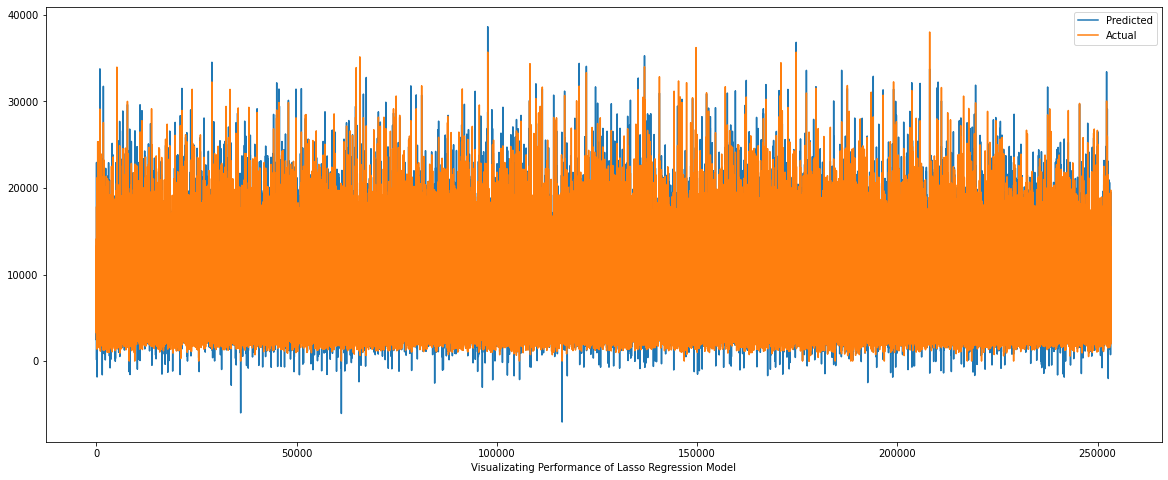

In [108]:
# Visualizing
plt.figure(figsize=(20,8))
plt.plot((y_lassotest_predicted))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('Visualizating Performance of Lasso Regression Model')
plt.show()

### <b> 3. Ridge Regression

#### <b> - Model Fitting

In [109]:
# Ridge Regression with Cross Validation
ridge = Ridge()
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30]}
ridge_regressor = RandomizedSearchCV(ridge, parameters, n_jobs=-1,scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train_std,y_train)
print('Training Dataset is successfully fitted in Ridge Regression Model')

Training Dataset is successfully fitted in Ridge Regression Model


In [110]:
# Looking into best fit value
Ridge_Optimal_model = ridge_regressor.best_estimator_
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -1688362.718412143


#### <b> - Predicting

In [111]:
y_ridge_predicted = Ridge_Optimal_model.predict(X_train_std)
y_ridgetest_predicted = Ridge_Optimal_model.predict(X_test_std)
print('Ridge Regression Model is successfully predicted using testing dataset')

Ridge Regression Model is successfully predicted using testing dataset


#### <b> - Evaluation Score

In [112]:
# Train and Test Score
RidgeTrain_Score = Ridge_Optimal_model.score(X_train_std,y_train)
RidgeTest_Score = Ridge_Optimal_model.score(X_test_std,y_test)
print('Training Score : ', RidgeTrain_Score,";","Testing Score :", RidgeTest_Score)

# Mean Absolute Error
RidgeMAE_Train = mean_absolute_error((y_train),(y_ridge_predicted))
RidgeMAE_Test = mean_absolute_error((y_test), (y_ridgetest_predicted))
print("Training MAE :" ,RidgeMAE_Train,";","Testing MAE :",RidgeMAE_Test)

# Mean Squared Error
RidgeMSE_Train = mean_squared_error((y_train),(y_ridge_predicted))
RidgeMSE_Test  = mean_squared_error((y_test), (y_ridgetest_predicted))
print("Training MSE :" ,RidgeMSE_Train,";","Testing MSE :",RidgeMSE_Test)

# Root Mean Squared Error
RidgeRMSE_Train = np.sqrt(RidgeMSE_Train) 
RidgeRMSE_Test = np.sqrt(RidgeMSE_Test)
print("Training RMSE :" ,RidgeRMSE_Train,";","Testing RMSE :",RidgeRMSE_Test)

# Root Mean Squared Log Error
RidgeRMSLE_Train = np.log(RidgeRMSE_Train)
RidgeRMSLE_Test = np.log(RidgeRMSE_Test)
print("Training RMSLE :" ,RidgeRMSLE_Train,";","Testing RMSLE :",RidgeRMSLE_Test)

# R2 Score
Ridger2_Train = r2_score((y_train),(y_ridge_predicted))
Ridger2_Test = r2_score((y_test), (y_ridgetest_predicted))
print("Training r2 :" ,Ridger2_Train,";","Testing r2 :",Ridger2_Test)

Training Score :  0.8246026402889459 ; Testing Score : 0.8254908760406511
Training MAE : 942.7768760745435 ; Testing MAE : 943.2337737150925
Training MSE : 1688095.502560163 ; Testing MSE : 1686363.8097118298
Training RMSE : 1299.2672945010827 ; Testing RMSE : 1298.6007121944103
Training RMSLE : 7.169555764941835 ; Testing RMSLE : 7.169042588506709
Training r2 : 0.8246026402889458 ; Testing r2 : 0.8254908760406511


In [113]:
ridge_model_scores = [{'ML Model':'Ridge Regression',
                       'Training Score':RidgeTrain_Score.round(2),'Testing Score':RidgeTest_Score.round(2),
                       'Training MAE' :RidgeMAE_Train.round(2),'Testing MAE':RidgeMAE_Test.round(2),
                       'Training MSE' : RidgeMSE_Train.round(2),'Testing MSE':RidgeMSE_Test.round(2),
                       'Training RMSE' :RidgeRMSE_Train.round(2),'Testing RMSE' :RidgeRMSE_Test.round(2),
                       'Training RMSLE' :RidgeRMSLE_Train.round(2),'Testing RMSLE' :RidgeRMSLE_Test.round(2),
                       'Training r2' :Ridger2_Train.round(2),'Testing r2' :Ridger2_Test.round(2)}]

In [114]:
eval_score2 = pd.DataFrame(data=ridge_model_scores)

#### <b> - Visualizing Performance of Ridge Regression Model

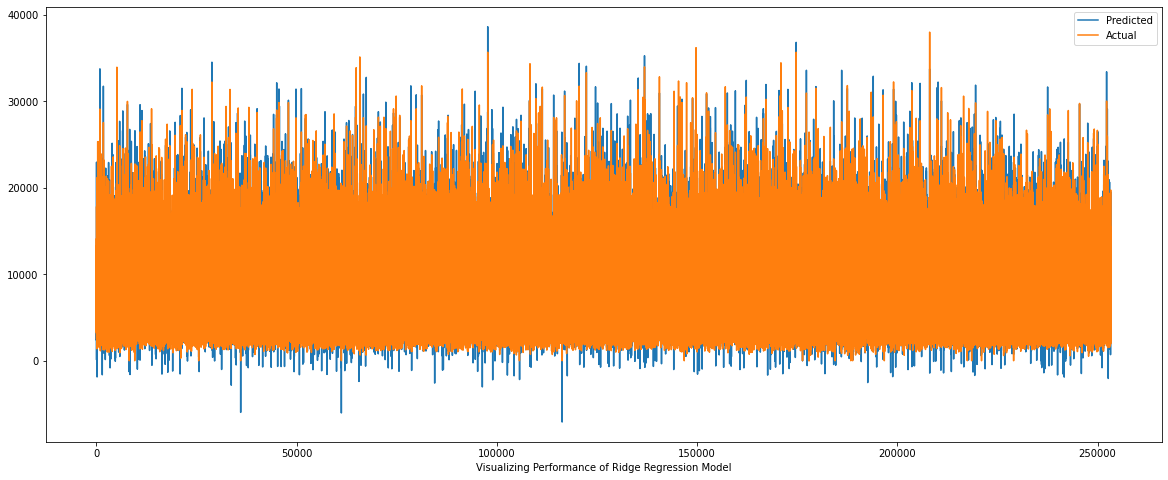

In [115]:
# Visualizing
plt.figure(figsize=(20,8))
plt.plot((y_ridgetest_predicted))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('Visualizing Performance of Ridge Regression Model')
plt.show()

### <b> 4. Decision Tree Regressor

#### <b> - Model Fitting

In [34]:
# Decision Tree Modelling
tree = DecisionTreeRegressor(criterion='mse',splitter='best')
treereg = tree.fit(X_train_std, y_train)
print('Training Dataset is successfully fitted in Decision Tree Regressor Model')

Training Dataset is successfully fitted in Decision Tree Regressor Model


#### <b> - Predicting

In [35]:
# Prediciting using test dataset
y_tree_predicted = treereg.predict(X_train_std)
y_treetest_predicted = treereg.predict(X_test_std)
print('Decision Tree Regressor Model is successfully predicted using testing dataset')

Decision Tree Regressor Model is successfully predicted using testing dataset


#### <b> - Evaluation Score

In [36]:
# Train and Test Score
dtTrain_Score = treereg.score(X_train_std,y_train)
dtTest_Score = treereg.score(X_test_std,y_test)
print('Training Score : ', dtTrain_Score,";","Testing Score :", dtTest_Score)

# Mean Absolute Error
dtMAE_Train = mean_absolute_error((y_train),(y_tree_predicted))
dtMAE_Test = mean_absolute_error((y_test), (y_treetest_predicted))
print("Training MAE :" ,dtMAE_Train,";","Testing MAE :",dtMAE_Test)

# Mean Squared Error
dtMSE_Train = mean_squared_error((y_train),(y_tree_predicted))
dtMSE_Test  = mean_squared_error((y_test), (y_treetest_predicted))
print("Training MSE :" ,dtMSE_Train,";","Testing MSE :",dtMSE_Test)

# Root Mean Squared Error
dtRMSE_Train = np.sqrt(dtMSE_Train) 
dtRMSE_Test = np.sqrt(dtMSE_Test)
print("Training RMSE :" ,dtRMSE_Train,";","Testing RMSE :",dtRMSE_Test)

# Root Mean Squared Log Error
dtRMSLE_Train = np.log(dtRMSE_Train)

dtRMSLE_Test = np.log(dtRMSE_Test)
print("Training RMSLE :" ,dtRMSLE_Train,";","Testing RMSLE :",dtRMSLE_Test)

# R2 Score
dtr2_Train = r2_score((y_train),(y_tree_predicted))
dtr2_Test = r2_score((y_test), (y_treetest_predicted))
print("Training r2 :" ,dtr2_Train,";","Testing r2 :",dtr2_Test)

Training Score :  0.9990274742700913 ; Testing Score : 0.94743219968266
Training MAE : 25.33013544190824 ; Testing MAE : 476.81385143048135
Training MSE : 9359.983032170494 ; Testing MSE : 507987.39916871395
Training RMSE : 96.74700528786663 ; Testing RMSE : 712.7323474970909
Training RMSLE : 4.572099378333848 ; Testing RMSLE : 6.56910596073349
Training r2 : 0.9990274742700913 ; Testing r2 : 0.9474321996826599


In [37]:
decisiontree_model_score = [{'ML Model':'Decision Tree Regressor',
                             'Training Score' :dtTrain_Score.round(2),'Testing Score' :dtTest_Score.round(2),
                             'Training MAE' :dtMAE_Train.round(2),'Testing MAE' :dtMAE_Test.round(2),
                             'Training MSE' :dtMSE_Train.round(2),'Testing MSE' :dtMSE_Test.round(2),
                             'Training RMSE' :dtRMSE_Train.round(2),'Testing RMSE':dtRMSE_Test.round(2),
                             'Training RMSLE' :dtRMSLE_Train.round(2),'Testing RMSLE' :dtRMSLE_Test.round(2),
                             'Training r2' :dtr2_Train.round(2),'Testing r2' :dtr2_Test.round(2)}]

In [38]:
eval_score3 = pd.DataFrame(data=decisiontree_model_score)

#### <b> - Visualizing Performance of Decision Tree Model

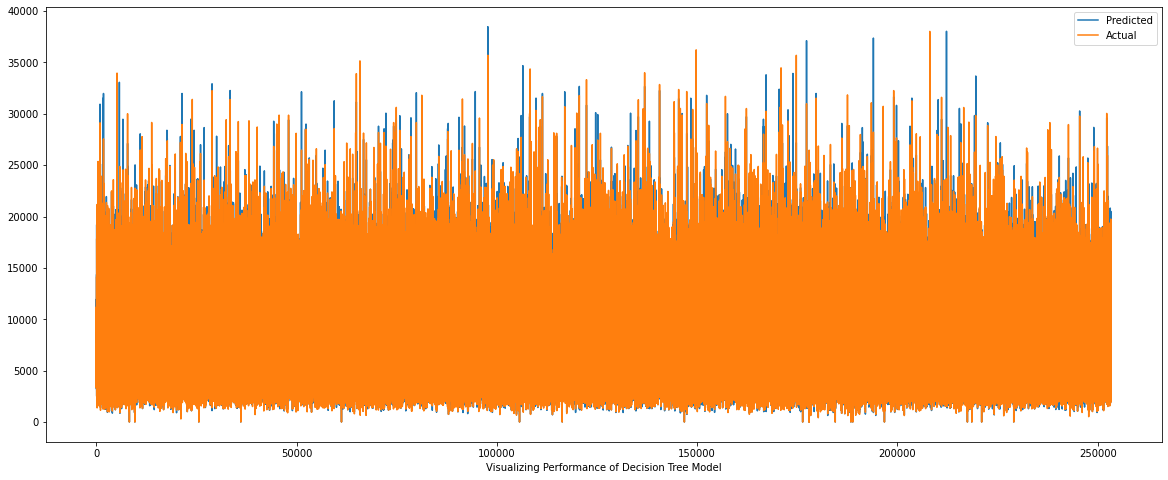

In [39]:
# Visualizing
plt.figure(figsize=(20,8))
plt.plot((y_treetest_predicted))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('Visualizing Performance of Decision Tree Model')
plt.show()

### <b> 5. Random Forest Regressor

#### <b> - Model Fitting

In [40]:
# Random Forest Regressor Modelling
ranfor = RandomForestRegressor(n_estimators=100,criterion='mse',random_state=True,n_jobs=-1,verbose=2)
ranforreg = ranfor.fit(X_train_std, y_train)
print('Training Dataset is successfully fitted in Random Forest Regressor Model')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.9min finished


#### <b> - Predicting

In [41]:
# Predicting using test dataset
y_ranfor_predicted = ranforreg.predict(X_train_std)
y_ranfortest_predicted = ranforreg.predict(X_test_std)
print('Random Forest Regressor Model is successfully predicted using testing dataset')

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    7.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   20.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    3.5s


Random Forest Regressor Model is successfully predicted using testing dataset


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    9.2s finished


#### <b> - Evaluation Score

In [42]:
# Train and Test Score
rtTrain_Score = ranforreg.score(X_train_std,y_train)
rtTest_Score = ranforreg.score(X_test_std,y_test)
print('Training Score : ', rtTrain_Score,";","Testing Score :", rtTest_Score)

# Mean Absolute Error
rtMAE_Train = mean_absolute_error((y_train),(y_ranfor_predicted))
rtMAE_Test = mean_absolute_error((y_test), (y_ranfortest_predicted))
print("Training MAE :" ,rtMAE_Train,";","Testing MAE :",rtMAE_Test)

# Mean Squared Error
rtMSE_Train = mean_squared_error((y_train),(y_ranfor_predicted))
rtMSE_Test  = mean_squared_error((y_test), (y_ranfortest_predicted))
print("Training MSE :" ,rtMSE_Train,";","Testing MSE :",rtMSE_Test)

# Root Mean Squared Error
rtRMSE_Train = np.sqrt(rtMSE_Train)
rtRMSE_Test = np.sqrt(rtMSE_Test)
print("Training RMSE :" ,rtRMSE_Train,";","Testing RMSE :",rtRMSE_Test)

# Root Mean Squared Log Error
rtRMSLE_Train = np.log(rtRMSE_Train)
rtRMSLE_Test = np.log(rtRMSE_Test)
print("Training RMSLE :" ,rtRMSLE_Train,";","Testing RMSLE :",rtRMSLE_Test)

# R2 Score
rtr2_Train = r2_score((y_train),(y_ranfor_predicted))
rtr2_Test = r2_score((y_test), (y_ranfortest_predicted))
print("Training r2 :" ,rtr2_Train,";","Testing r2 :",rtr2_Test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    7.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   20.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    3.3s


Training Score :  0.9949653349890081 ; Testing Score : 0.9685766801838588
Training MAE : 148.38634773902282 ; Testing MAE : 372.4391529140431
Training MSE : 48455.663049624614 ; Testing MSE : 303658.33096088027
Training RMSE : 220.12647057913006 ; Testing RMSE : 551.0520220096105
Training RMSLE : 5.39420224744882 ; Testing RMSLE : 6.311829218506756
Training r2 : 0.994965334989008 ; Testing r2 : 0.9685766801838587


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    8.8s finished


In [43]:
RandomForest_model_scores = [{'ML Model':'Random Forest Regressor',
                              'Training Score':rtTrain_Score.round(2),'Testing Score':rtTest_Score.round(2),
                              'Training MAE':rtMAE_Train.round(2),'Testing MAE':rtMAE_Test.round(2),
                              'Training MSE':rtMSE_Train.round(2),'Testing MSE':rtMSE_Test.round(2),
                              'Training RMSE':rtRMSE_Train.round(2),'Testing RMSE':rtRMSE_Test.round(2),
                              'Training RMSLE':rtRMSLE_Train.round(2),'Testing RMSLE':rtRMSLE_Test.round(2),
                              'Training r2':rtr2_Train.round(2),'Testing r2':rtr2_Test.round(2)}]

In [44]:
eval_score4 = pd.DataFrame(data=RandomForest_model_scores)

#### <b> - Visualizing Performance of Random Forest Model

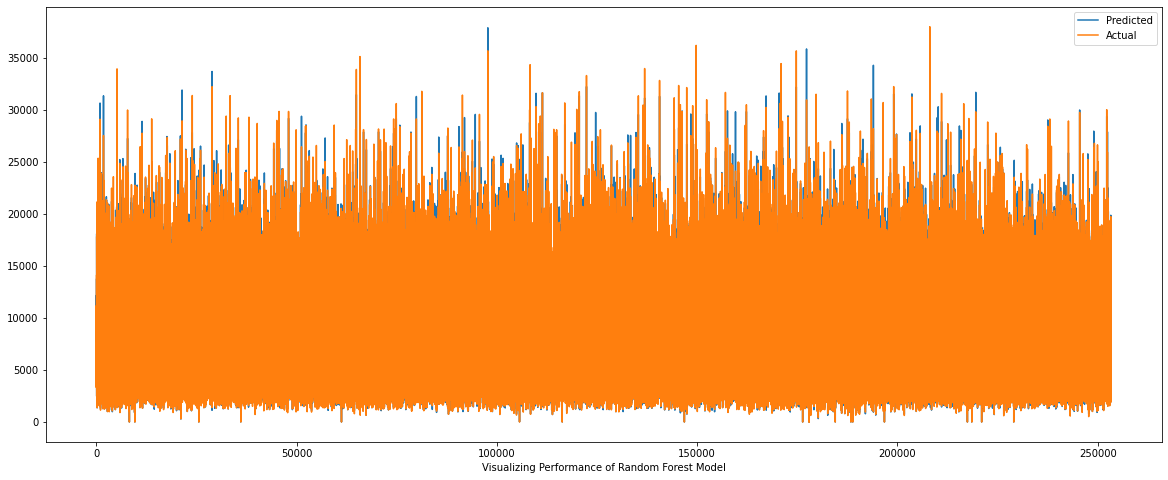

In [45]:
plt.figure(figsize=(20,8))
plt.plot((y_ranfortest_predicted))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('Visualizing Performance of Random Forest Model')
plt.show()

# <b> Feature Importance

---

Text(0.5, 0, 'Relative Importance')

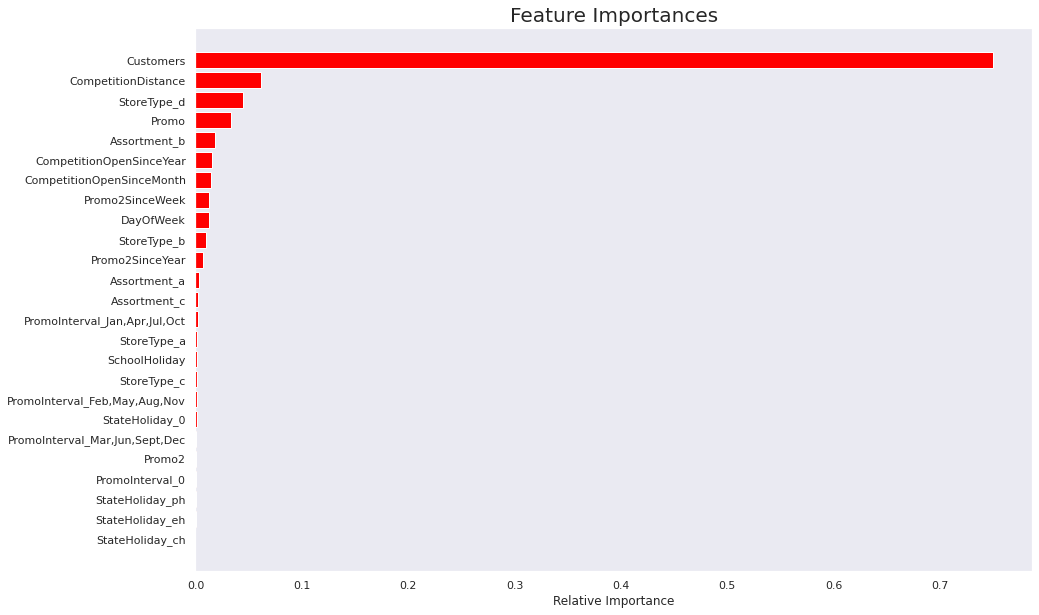

In [122]:
# Plotting Feature Importance 
features = X_train.columns
importances = ranforreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# <b> Results Comparison

---



In [116]:
# Concating all the results
evscore = [eval_score,eval_score1,eval_score2,eval_score3,eval_score4]
Results = pd.concat(evscore)
Results

ML Model  Training Score  ...  Training r2  Testing r2
0        Linear Regression            0.82  ...         0.82        0.83
0         Lasso Regression            0.82  ...         0.82        0.83
0         Ridge Regression            0.82  ...         0.82        0.83
0  Decision Tree Regressor            1.00  ...         1.00        0.95
0  Random Forest Regressor            0.99  ...         0.99        0.97

[5 rows x 13 columns]

### <b> Model Score

#### <b> Training Dataset Score

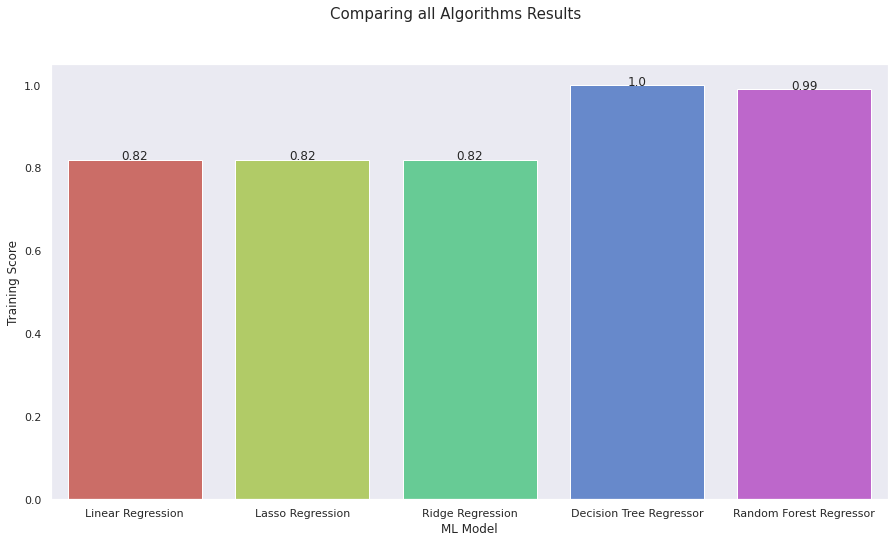

In [117]:
# Comparing the all algorithms results
sns.set_theme(style='dark')
fig,ax = plt.subplots(figsize = (15,8))
fig.suptitle('Comparing all Algorithms Results', fontsize=15)
sns.barplot(x='ML Model',y='Training Score',data = Results,palette='hls')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height,height ,ha="center")

#### <b> Testing Dataset Score

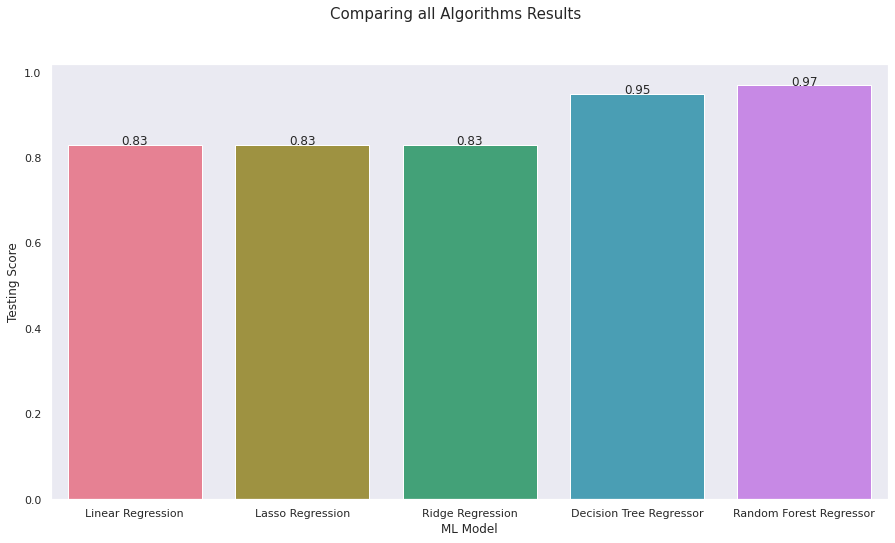

In [118]:
# Comparing the all algorithms results
sns.set_theme(style='dark')
fig,ax = plt.subplots(figsize = (15,8))
fig.suptitle('Comparing all Algorithms Results', fontsize=15)
sns.barplot(x='ML Model',y='Testing Score',data = Results,palette = 'husl')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height,height ,ha="center")

### <b> Root Mean Squared Error
> <b> Lower the RMSE better the model perform 

####<b> Training Dataset RMSE

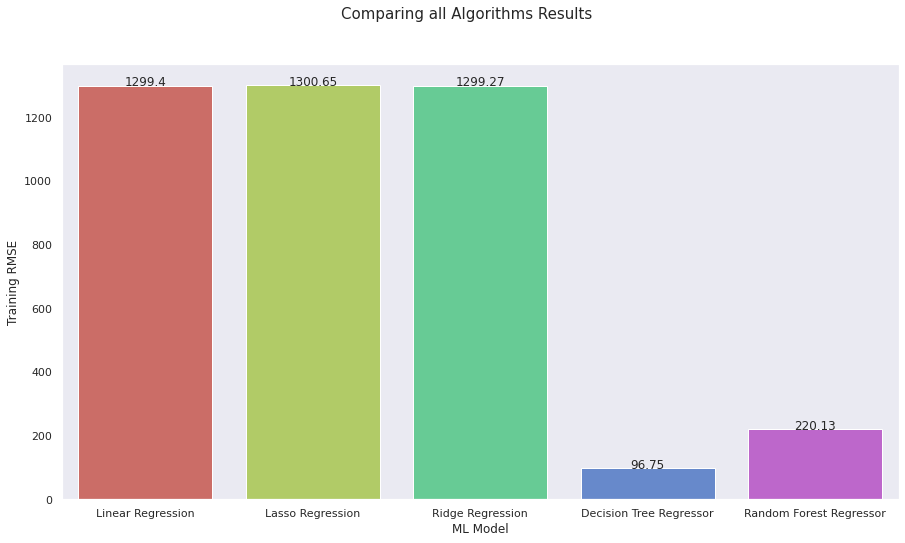

In [119]:
# Comparing the all algorithms results
sns.set_theme(style='dark')
fig,ax = plt.subplots(figsize = (15,8))
fig.suptitle('Comparing all Algorithms Results', fontsize=15)
sns.barplot(x='ML Model',y='Training RMSE',data = Results,palette='hls')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height,height ,ha="center")

#### <b> Testing Dataset RMSE

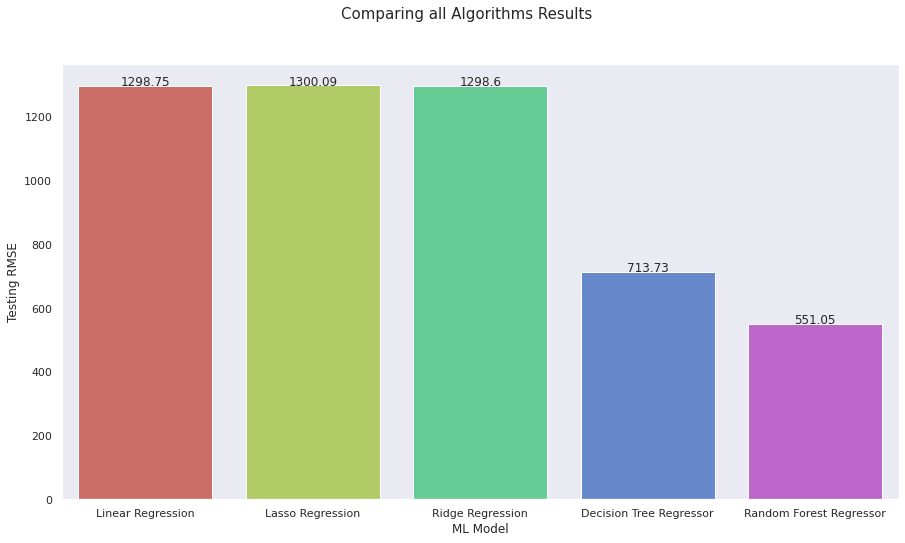

In [120]:
# Comparing the all algorithms results
sns.set_theme(style='dark')
fig,ax = plt.subplots(figsize = (15,8))
fig.suptitle('Comparing all Algorithms Results', fontsize=15)
sns.barplot(x='ML Model',y='Testing RMSE',data = Results,palette='hls')
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height,height ,ha="center")

# <b> Conclusion

---



>* <b>Comparing results of all Machine Learning model based on the evaluation metrics.
* <b>Linear Regression, Lasso Regression, and Ridge Regression mostlyunder perform when it is used for prediction.
* <b> As these linear models will work fine when the correlation between each variable is high and either or other the dependent variable is correlated to the dependent variable.
* <b> These Linear models are high bias and low variance in nature.
* <b> Decision Tree Regressor works well on both training and testing set.
* <b> But it is working better than all the linear models.
* Decision Trees are low bias and high variance in nature.
* <b> Random Forest Regressor works well on both training and testing set.
* <b> And Random Forest Regressor has low bias and high variance (Compared to decision tree it is low).
* <b> So we can use Random Forest Regressor model and its has low MSE, MAE, RMSE and RMSLE values in testing set.  